## **Internship on Data Science and Analytics| Project 2**
# **Customer Segmentation for Marketing Strategy**

In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering


# **1. Under standing the problem**

 A dataset is given,containing details of marketing campaigns done via phone with various details for customers such as demographics, last campaign details etc. It is rquired to predict accurately whether the customer will subscribe to the focus product for the campaign - Term
Deposit after the campaign?

# **Train data**

### **.Data loading**

In [294]:
#loading train data
df=pd.read_csv("/content/Train.csv")

# **2.Data Exploration**

In [295]:
#Displying Dataframe
df.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


In [296]:
#Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

There are 31647 records of data under 18 columns.There are categorical as well as numerical columns with some missing values.

In [297]:
#The data types value_counts
df.dtypes.value_counts()

object     10
float64     5
int64       3
Name: count, dtype: int64

In [298]:
#Statistical summary of numeric data
df.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed
count,31028.000000,31248.000000,31647.000000,31336.000000,31535.000000,5816.000000,31647.000000,31647.000000
mean,40.439216,1368.112615,15.818561,256.184038,2.776629,224.995186,0.591620,0.107246
std,10.751392,3085.342417,8.322970,256.181479,3.153293,114.991828,2.499675,0.309430
min,18.000000,-8020.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32.000000,72.000000,8.000000,103.000000,1.000000,133.000000,0.000000,0.000000
50%,39.000000,449.000000,16.000000,179.000000,2.000000,195.000000,0.000000,0.000000
75%,48.000000,1413.000000,21.000000,315.250000,3.000000,329.000000,0.000000,0.000000
max,97.000000,102128.000000,31.000000,4900.000000,63.000000,871.000000,275.000000,1.000000


In [299]:
#summary of the categorical columns
df.describe(include='object')

,id,job_type,marital,education,default,housing_loan,personal_loan,communication_type,month,prev_campaign_outcome
count,31647,31647,31497,31647,31647,31647,31498,31647,31647,31647
unique,31647,12,3,4,2,2,2,3,12,4
top,id_43823,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,1,6816,18945,16247,31094,17700,26463,20480,9685,25833


In [300]:
#Missing values identification
df.isna().sum()

id                                      0
customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

In [301]:
#Defining empty lists to identify which columns to be handled for missing values and encode
col_to_le=[]
col_to_miss=[]

In [302]:
#Defining a function for the univariate analysis of each column,
#ploting histograms for discrete numerical column, kdeplot for continuous numeric and
#countplot for categorical column , also identifying number of  missing values for each column
def eda(x,df,y):
  if df[x].dtype=='object':
    sns.countplot(df[x])
    plt.show()
    print(f"value_counts of {x}",df[x].value_counts())
  elif df[x].dtype=='int64':
    sns.histplot(df[x])
    plt.show()
    print(f"value_counts of {x}",df[x].value_counts())
  else:
    sns.kdeplot(df[x])
    plt.show()



  print(f"missing values of {x}",df[x].isna().sum())
  if df[x].isna().sum()>0:
    y.append(x)


In [303]:
#Column names list
df.columns

Index(['id', 'customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'prev_campaign_outcome',
       'term_deposit_subscribed'],
      dtype='object')

In [304]:
#To check for duplicated records of data
df[df.duplicated(keep='first')]

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed


# **Understanding column data**





## **customer_age**

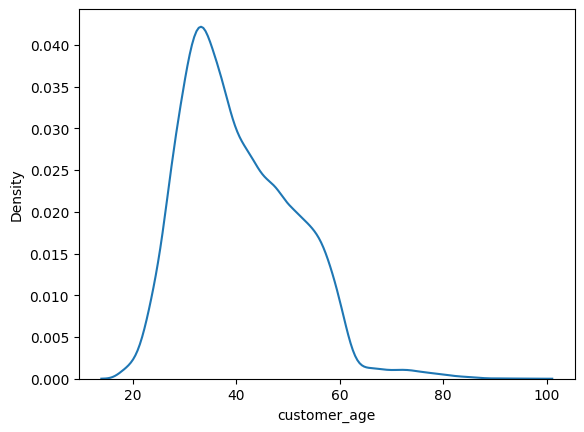

missing values of customer_age 619


In [305]:
eda('customer_age',df,col_to_miss)

1.Continous numeric data

2.Missing values to be handled, can be filled with mean

## **job_type**

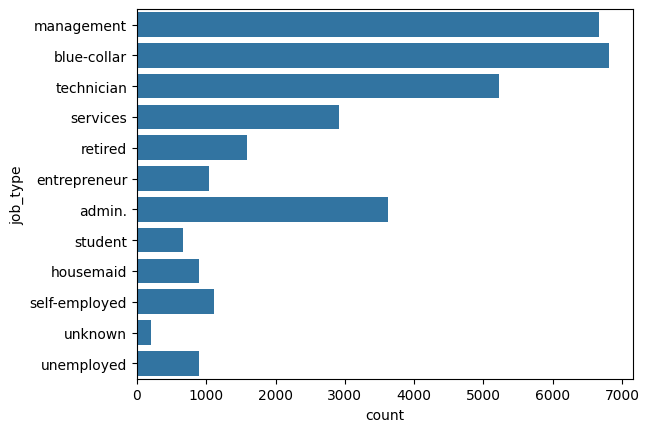

value_counts of job_type job_type
blue-collar      6816
management       6666
technician       5220
admin.           3627
services         2923
retired          1591
self-employed    1111
entrepreneur     1037
unemployed        901
housemaid         893
student           663
unknown           199
Name: count, dtype: int64
missing values of job_type 0


In [306]:
eda('job_type',df,col_to_miss)

In [307]:
col_to_le.append('job_type')

1.Categorical data to be encoded

2.No missing values


## **marital**

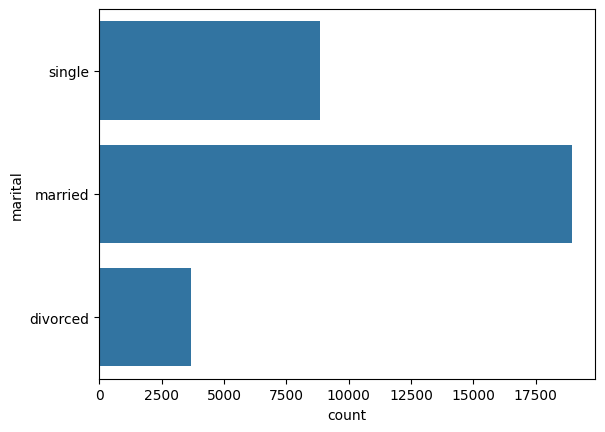

value_counts of marital marital
married     18945
single       8857
divorced     3695
Name: count, dtype: int64
missing values of marital 150


In [308]:
eda('marital',df,col_to_miss)

In [309]:
col_to_le.append('marital')

1.Categorical data to be encoded

2.Missing values to be handled

3.Majority is married

### ***education  ***

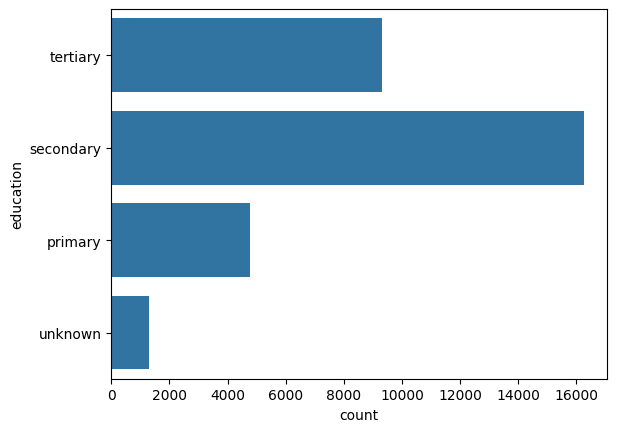

value_counts of education education
secondary    16247
tertiary      9321
primary       4787
unknown       1292
Name: count, dtype: int64
missing values of education 0


In [310]:
eda('education',df,col_to_miss)

In [311]:
col_to_le.append('education')

1.Categorical data to be encoded

2.No missing values

3.Secondary education is polling the most

## **'default'**

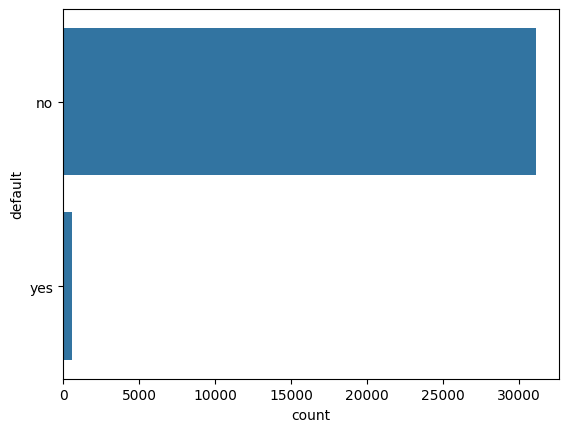

value_counts of default default
no     31094
yes      553
Name: count, dtype: int64
missing values of default 0


In [312]:
eda('default',df,col_to_miss)

In [313]:
col_to_le.append('default')

1.Categorical data to be encoded

2.No missing values

3.Majority is non defaulters

## **'balance'**

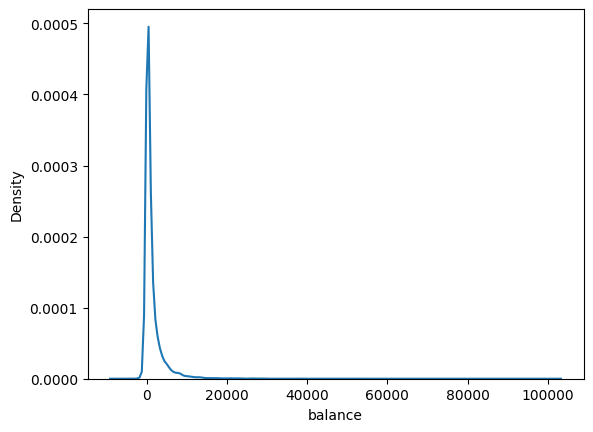

missing values of balance 399


In [314]:
eda('balance',df,col_to_miss)

1.Continous numeric data

2.Missing values to be treated

3.Left skewed



## **'housing_loan'**

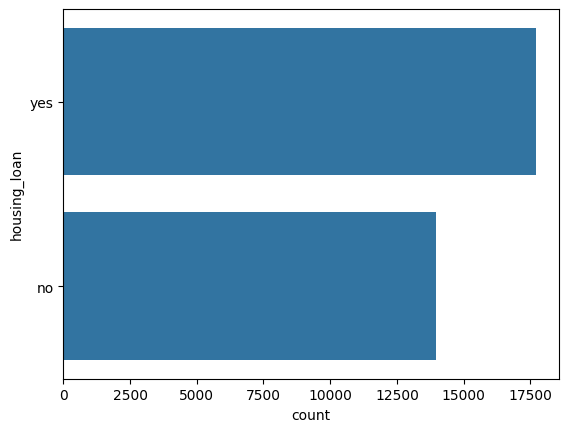

value_counts of housing_loan housing_loan
yes    17700
no     13947
Name: count, dtype: int64
missing values of housing_loan 0


In [315]:
eda('housing_loan',df,col_to_miss)

In [316]:
col_to_le.append('housing_loan')

1.Categorical data to be encoded


## **personal_loan**

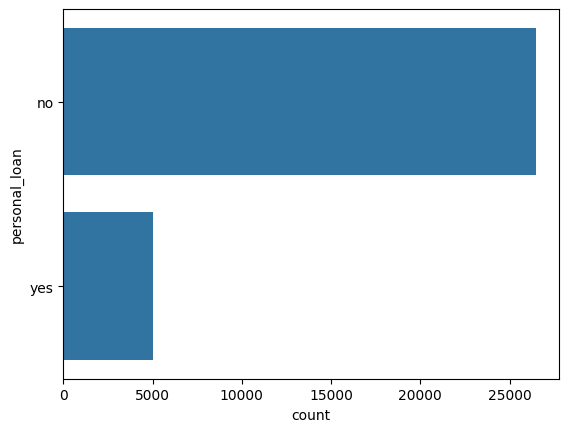

value_counts of personal_loan personal_loan
no     26463
yes     5035
Name: count, dtype: int64
missing values of personal_loan 149


In [317]:
eda('personal_loan',df,col_to_miss)

In [318]:
col_to_le.append('personal_loan')

1.Categorical data to be encoded

2.Missing values to be treated

3.Majority have personal loan

## **'communication_type'**

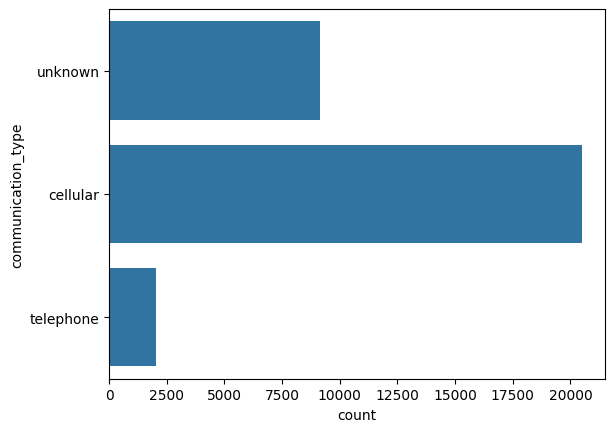

value_counts of communication_type communication_type
cellular     20480
unknown       9151
telephone     2016
Name: count, dtype: int64
missing values of communication_type 0


In [319]:
eda('communication_type',df,col_to_miss)

In [320]:
col_to_le.append('communication_type')

1.Categorical data to be encoded

2.Majority have been contacted by cellular

## **'day_of_month'**

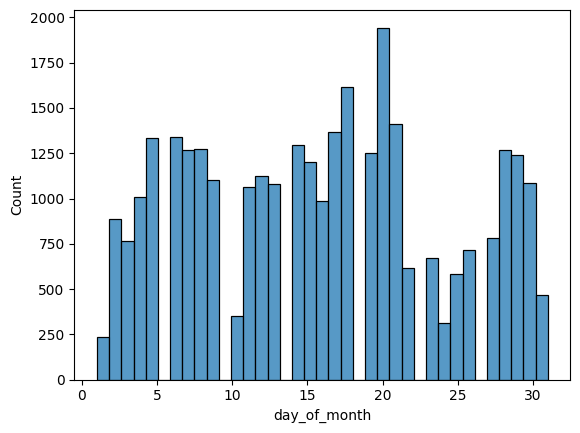

value_counts of day_of_month day_of_month
20    1944
18    1615
21    1414
17    1366
6     1342
5     1336
14    1294
8     1276
7     1269
28    1268
19    1249
29    1240
15    1201
12    1122
9     1101
30    1087
13    1080
11    1062
4     1009
16     985
2      885
27     780
3      767
26     715
23     670
22     618
25     583
31     469
10     353
24     312
1      235
Name: count, dtype: int64
missing values of day_of_month 0


In [321]:
eda('day_of_month',df,col_to_miss)

1.Discrete Numeric data


## **'month'**

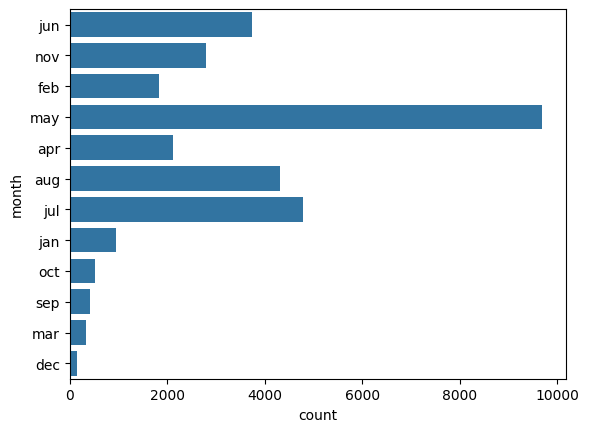

value_counts of month month
may    9685
jul    4786
aug    4308
jun    3746
nov    2801
apr    2111
feb    1836
jan     953
oct     510
sep     417
mar     338
dec     156
Name: count, dtype: int64
missing values of month 0


In [322]:
eda('month',df,col_to_miss)

In [323]:
col_to_le.append('month')

1.Categorical data to be encoded

## **'last_contact_duration'**

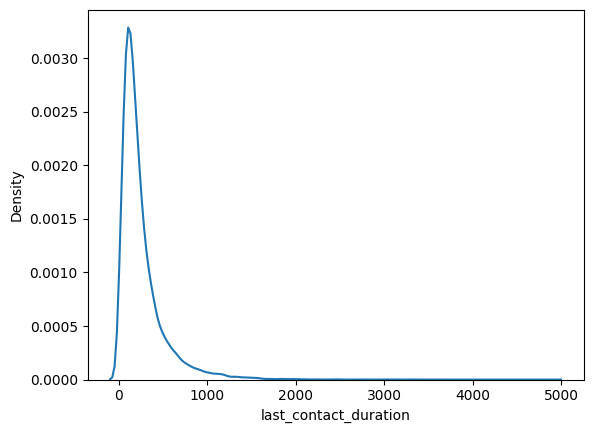

missing values of last_contact_duration 311


In [324]:
eda('last_contact_duration',df,col_to_miss)

1.Continuous numeric data

2.Missing values can be filled by zero

## **'num_contacts_in_campaign'**

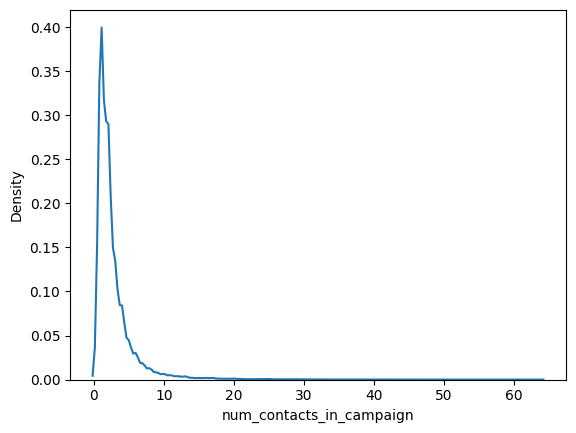

missing values of num_contacts_in_campaign 112


In [325]:
eda('num_contacts_in_campaign',df,col_to_miss)

1.Continuous numeric data but it can be converted to discrete numeric after treating missing values.

## **'days_since_prev_campaign_contact'**

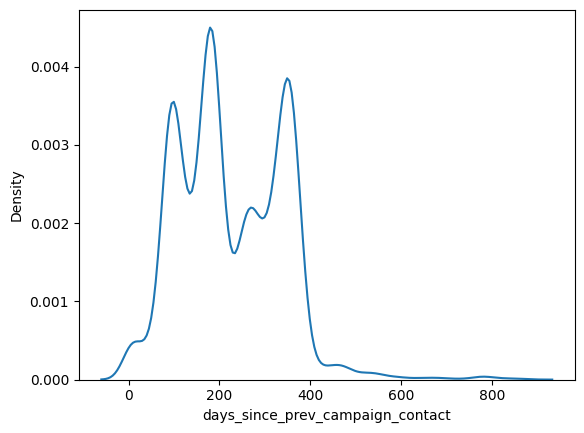

missing values of days_since_prev_campaign_contact 25831


In [326]:
eda('days_since_prev_campaign_contact',df,col_to_miss)

1.Continuous numeric data

2.Missing values to be treated


## **'num_contacts_prev_campaign'**

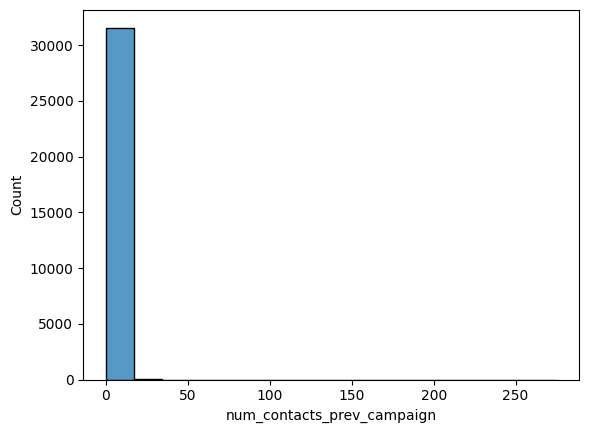

value_counts of num_contacts_prev_campaign num_contacts_prev_campaign
0      25831
1       1938
2       1507
3        806
4        500
5        311
6        188
7        148
8         91
9         62
10        48
11        46
12        34
13        28
14        15
15        14
17        11
20         7
19         7
23         6
16         6
22         5
18         5
24         4
25         4
27         4
29         3
30         3
37         2
21         2
275        1
55         1
32         1
41         1
26         1
38         1
40         1
51         1
58         1
35         1
28         1
Name: count, dtype: int64
missing values of num_contacts_prev_campaign 0


In [327]:
eda('num_contacts_prev_campaign',df,col_to_miss)

1.Discrte numeric column

## **'prev_campaign_outcome'**

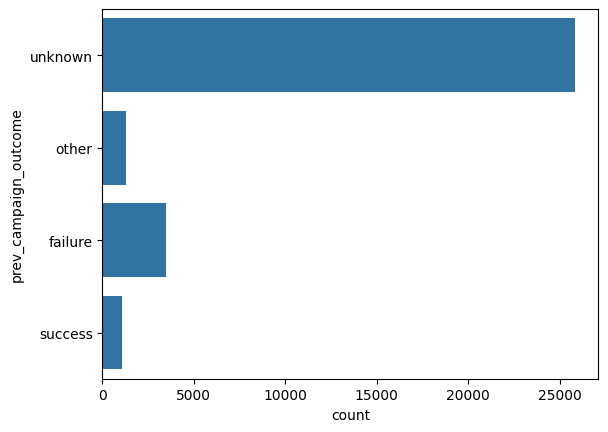

value_counts of prev_campaign_outcome prev_campaign_outcome
unknown    25833
failure     3472
other       1272
success     1070
Name: count, dtype: int64
missing values of prev_campaign_outcome 0


In [328]:
eda('prev_campaign_outcome',df,col_to_miss)

In [329]:
col_to_le.append('prev_campaign_outcome')

1.Categorical data to be  label encoded
2.Majority has unknown outcome

## **'term_deposit_subscribed**

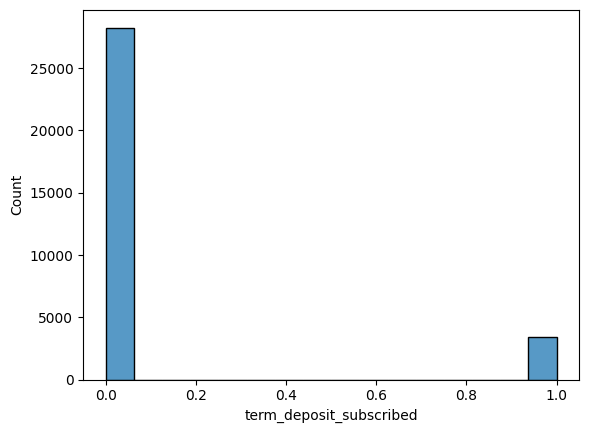

value_counts of term_deposit_subscribed term_deposit_subscribed
0    28253
1     3394
Name: count, dtype: int64
missing values of term_deposit_subscribed 0


In [330]:
eda('term_deposit_subscribed',df,col_to_miss)

1.Discrete numeric data
2.Majority is No

# **4.Data Cleaning**

### **Handling missing Values**

In [331]:
#Columns t handle missing values
col_to_miss

['customer_age',
 'marital',
 'balance',
 'personal_loan',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'days_since_prev_campaign_contact']

In [332]:
#Customer age
#filtered=df[df['customer_age'].isna()]
#filtered

In [333]:
#pd.set_option('display.max_rows', None)
#pd.crosstab(df['customer_age'],df['marital'])

In [334]:
#Filling na value with median of the columns
df['customer_age'].fillna(df['customer_age'].median(),inplace=True)

In [335]:
#filtered=df[df['marital'].isna()]
#filtered

In [336]:
#Marital na values are filled by constant = missing
df['marital'].fillna('missing',inplace=True)

In [337]:
#Balance
#filtered=df[df['balance'].isna()]
#filtered

In [338]:
#Filling na values with zero
df['balance']=df['balance'].fillna(0)

In [339]:
#Personal loan
#pd.crosstab(df['personal_loan'],df['job_type'])

In [340]:
#filtered=df[df['personal_loan'].isna()]
#filtered

In [341]:
#Filling na values with constant=no
df['personal_loan'].fillna('no',inplace=True)

In [342]:
#last_contact_duration
df['last_contact_duration'].fillna(0,inplace=True)

In [343]:
 #filtered=df[df['last_contact_duration'].isna()]
 #filtered

In [344]:
#num_contacts_in_campaign
#filtered=df[df['num_contacts_in_campaign'].isna()]
#filtered

In [345]:
#filling na values with  0
df['num_contacts_in_campaign'].fillna(0,inplace=True)

In [346]:
df['num_contacts_in_campaign'] = df['num_contacts_in_campaign'].round().astype(int)


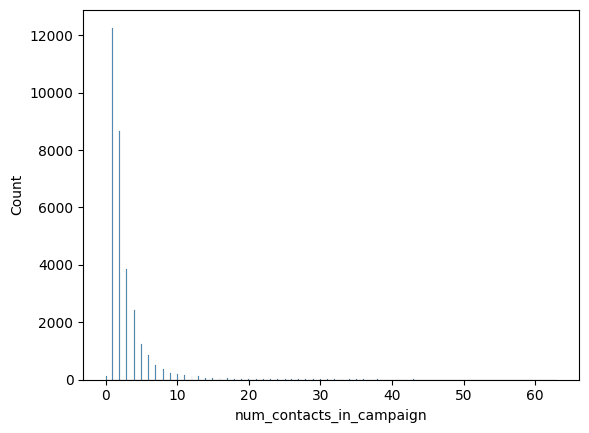

value_counts of num_contacts_in_campaign num_contacts_in_campaign
1     12270
2      8678
3      3845
4      2437
5      1256
6       871
7       524
8       374
9       235
10      188
11      145
12      112
0       112
13      110
14       57
16       56
15       54
17       53
20       32
19       31
18       30
21       21
25       19
23       16
24       15
22       13
28       13
29       12
26        9
32        8
31        7
27        7
30        6
33        5
34        4
43        3
38        3
36        3
35        3
41        2
37        2
63        1
46        1
51        1
55        1
58        1
44        1
Name: count, dtype: int64
missing values of num_contacts_in_campaign 0


In [347]:
eda('num_contacts_in_campaign',df,col_to_miss)

In [348]:
#days_since_prev_campaign_contact na values filled by zero
df['days_since_prev_campaign_contact'].fillna(0,inplace=True)

In [349]:
#pd.crosstab(df['num_contacts_in_campaign'],df['job_type'])

In [350]:
#Filling na values with zero
df['num_contacts_in_campaign'].fillna(0,inplace=True)

In [351]:
#Number of contacts in campign is converted as type int
df['num_contacts_in_campaign'] = df['num_contacts_in_campaign'].round().astype(int)

In [352]:
df.isna().sum()

id                                  0
customer_age                        0
job_type                            0
marital                             0
education                           0
default                             0
balance                             0
housing_loan                        0
personal_loan                       0
communication_type                  0
day_of_month                        0
month                               0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
prev_campaign_outcome               0
term_deposit_subscribed             0
dtype: int64

Missing values are treated.

### **Outliers-Handling**

<Axes: >

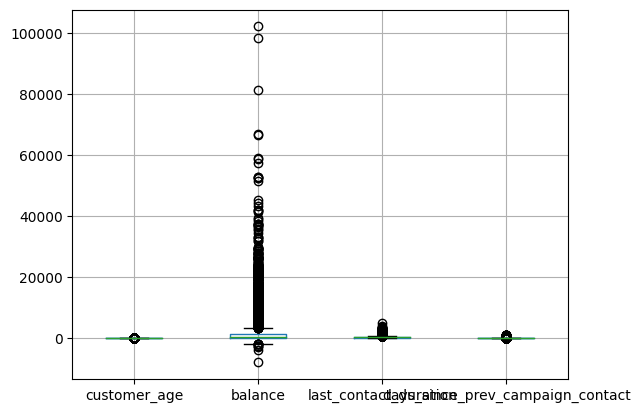

In [353]:
#Plotting boxplots to identify the outliers
df.select_dtypes(include='float').boxplot()

In [354]:
#Identifying ouliers in each column of continuous numeric data
for i in df.select_dtypes(include='float').columns:
  outlier=[]
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1

  for j in df[i]:
    if(j< Q1-1.5* IQR) | (j> Q3+1.5* IQR):
      outlier.append(j)

  print(f"outlier for column {i}are ",outlier)
  #Outlier is not handled as it will remove the column 'num_contacts_prev_campaign'
  '''
  #Handling outliers

  df[i] = np.clip(df[i], Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)
  outlier_n=[]
  for j in df[i]:
    if(j< Q1-1.5* IQR) | (j> Q3+1.5* IQR):
      outlier_n.append(j)
  print(f"outlier for column {i}are ",outlier_n)
  '''


outlier for column customer_ageare  [78.0, 76.0, 73.0, 88.0, 73.0, 81.0, 79.0, 73.0, 77.0, 75.0, 74.0, 74.0, 86.0, 77.0, 79.0, 75.0, 95.0, 77.0, 74.0, 74.0, 79.0, 76.0, 74.0, 76.0, 73.0, 80.0, 75.0, 79.0, 77.0, 74.0, 82.0, 79.0, 76.0, 75.0, 82.0, 73.0, 76.0, 86.0, 73.0, 77.0, 80.0, 83.0, 78.0, 75.0, 74.0, 75.0, 77.0, 74.0, 77.0, 76.0, 77.0, 77.0, 79.0, 79.0, 73.0, 79.0, 75.0, 83.0, 84.0, 73.0, 79.0, 77.0, 76.0, 78.0, 74.0, 74.0, 83.0, 73.0, 78.0, 81.0, 73.0, 73.0, 76.0, 75.0, 80.0, 75.0, 84.0, 73.0, 80.0, 74.0, 74.0, 76.0, 78.0, 78.0, 75.0, 97.0, 81.0, 82.0, 75.0, 77.0, 77.0, 73.0, 76.0, 75.0, 87.0, 73.0, 73.0, 84.0, 81.0, 80.0, 73.0, 73.0, 73.0, 86.0, 78.0, 82.0, 79.0, 77.0, 76.0, 75.0, 87.0, 73.0, 80.0, 80.0, 81.0, 80.0, 91.0, 80.0, 73.0, 77.0, 85.0, 74.0, 74.0, 75.0, 74.0, 73.0, 75.0, 86.0, 75.0, 74.0, 75.0, 75.0, 80.0, 75.0, 75.0, 85.0, 74.0, 77.0, 74.0, 83.0, 86.0, 76.0, 85.0, 74.0, 74.0, 75.0, 76.0, 85.0, 73.0, 81.0, 73.0, 80.0, 79.0, 91.0, 76.0, 79.0, 77.0, 82.0, 73.0, 76.0, 74.

In [355]:
#Creating a copy of data frame and further analysis is done on df_n
df_n=df.copy()

In [356]:
#Dropping the id
df_n.drop(['id'],axis=1,inplace=True)

# **5.Data Visualisation**

**a.Univariate Analysis**

**categorical columns**

In [357]:

df_n_c=df_n.select_dtypes(include='object')
df_n_c.columns

Index(['job_type', 'marital', 'education', 'default', 'housing_loan',
       'personal_loan', 'communication_type', 'month',
       'prev_campaign_outcome'],
      dtype='object')

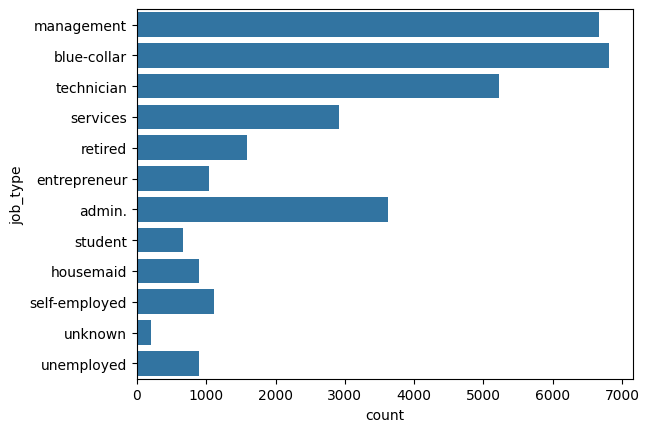

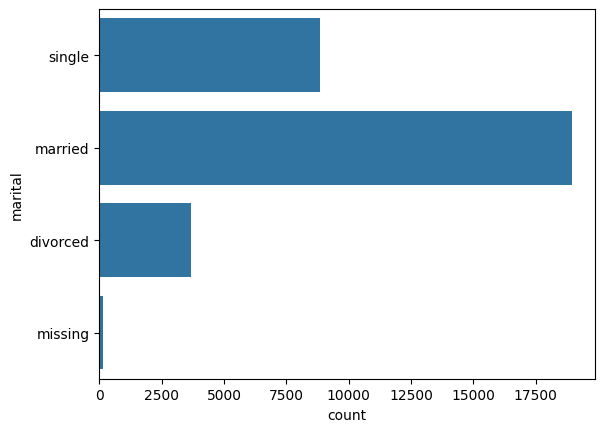

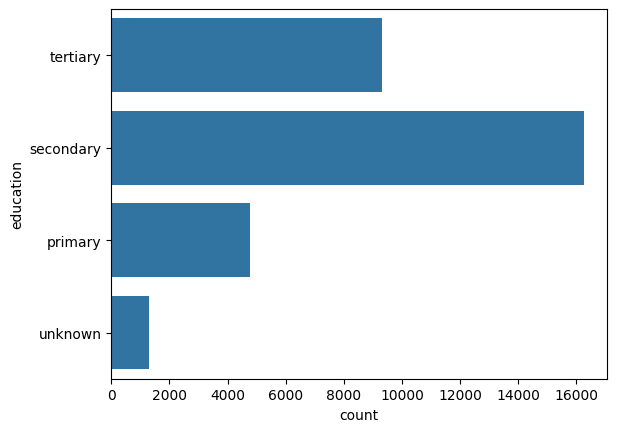

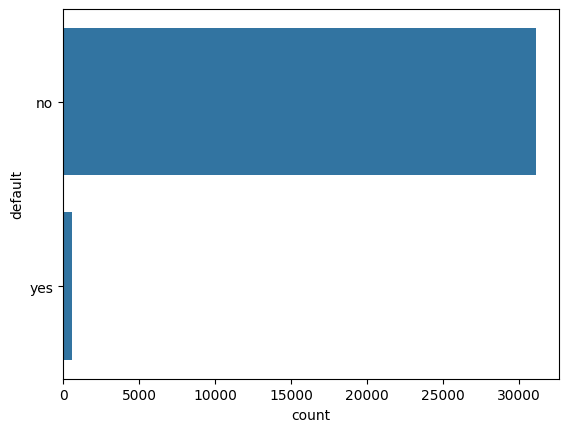

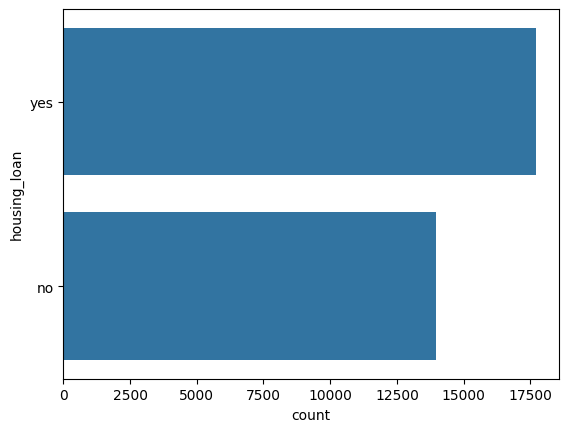

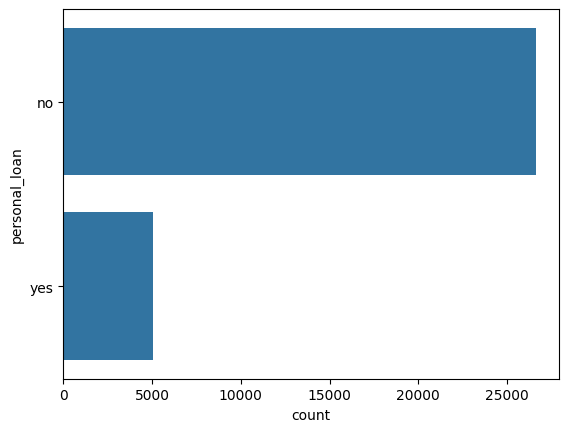

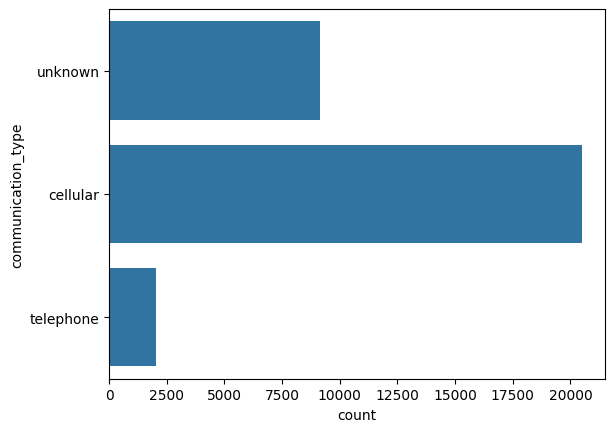

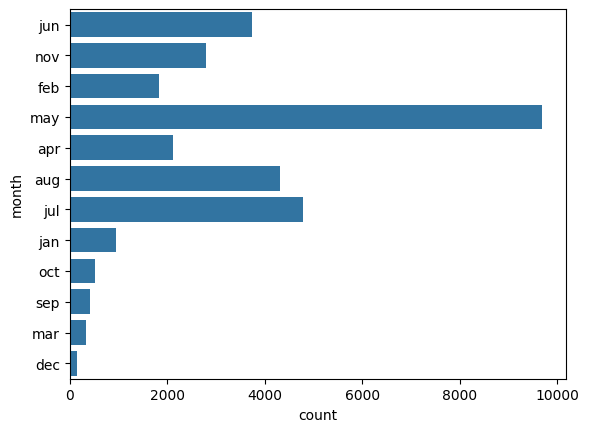

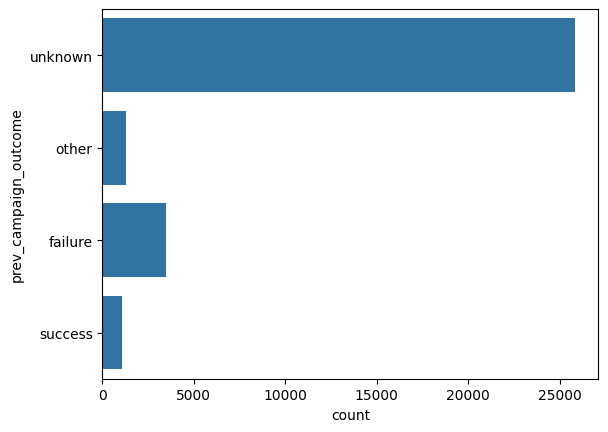

In [358]:
#Categorical columns
pd.set_option('display.max_rows', None)
for i in df_n.select_dtypes(include='object').columns:
  sns.countplot(df_n[i])
  plt.show()

**Continuous numeric columns**

In [359]:
df_n_nu_c=df_n.select_dtypes(include='float')
df_n_nu_c.columns

Index(['customer_age', 'balance', 'last_contact_duration',
       'days_since_prev_campaign_contact'],
      dtype='object')

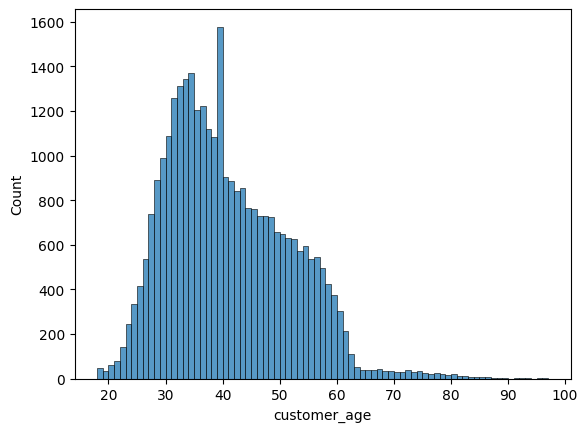

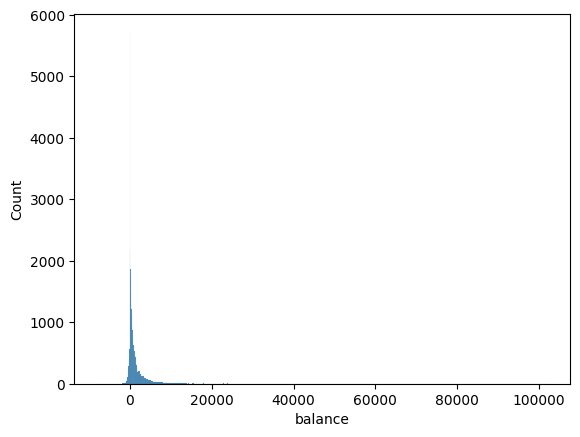

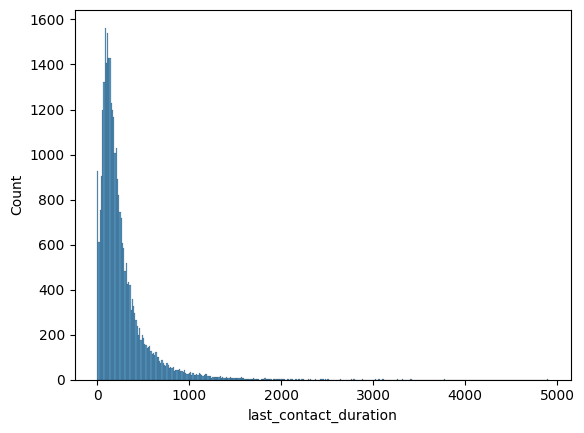

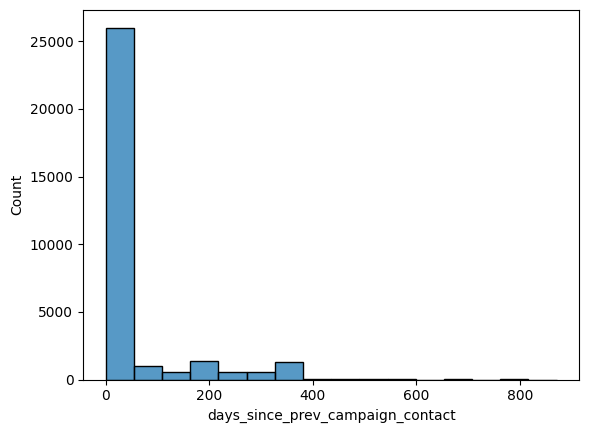

In [360]:
#Continous numeric columns
pd.set_option('display.max_rows', None)
for i in df_n.select_dtypes(include='float').columns:
  sns.histplot(df_n[i])
  plt.show()

**Discrete numeric columns**

In [361]:
df_n_nu_d=df_n.select_dtypes(include='int')
df_n_nu_d.columns

Index(['day_of_month', 'num_contacts_in_campaign',
       'num_contacts_prev_campaign', 'term_deposit_subscribed'],
      dtype='object')

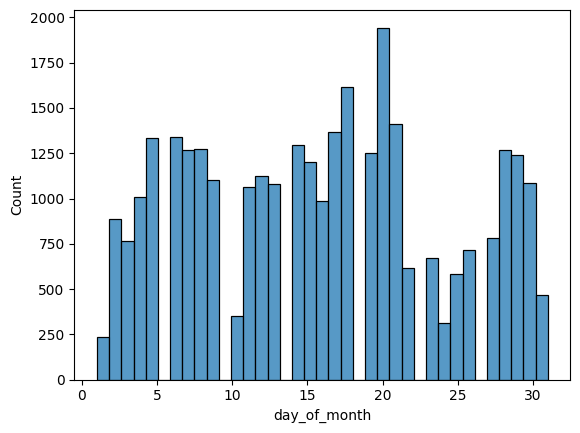

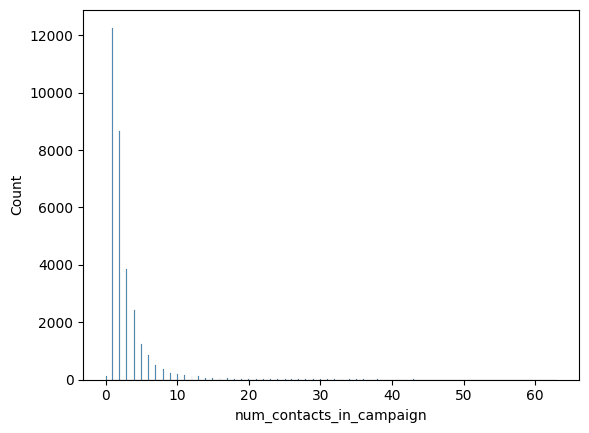

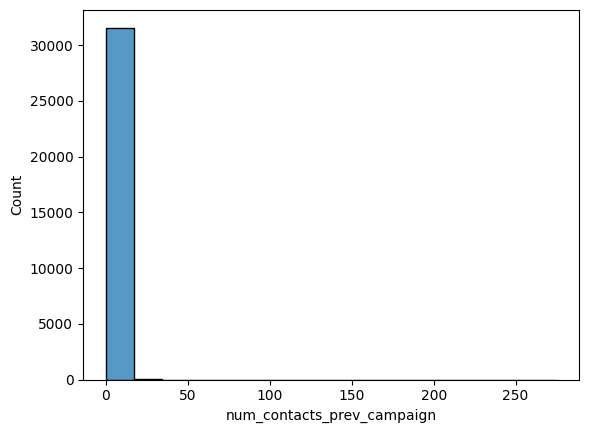

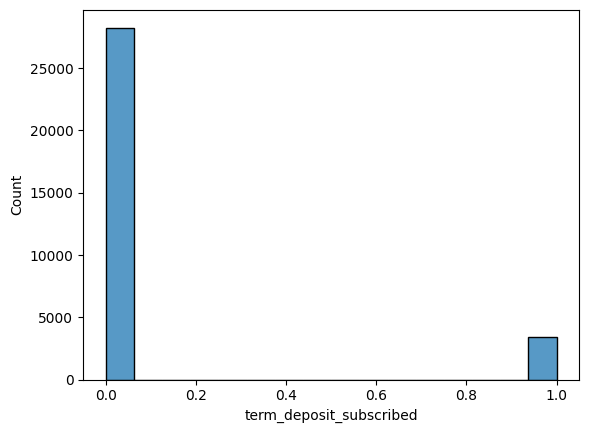

In [362]:
#Discrete numeric columns
pd.set_option('display.max_rows', None)
for i in df_n.select_dtypes(include='int').columns:
  sns.histplot(df_n[i])
  plt.show()

## **2.Bivariate Analysis**

For bivariate analysis, we usually use boxplot(categorical vs numerical), scatterplot(numerical vs numerical), or contingency table(categorical vs categorical).

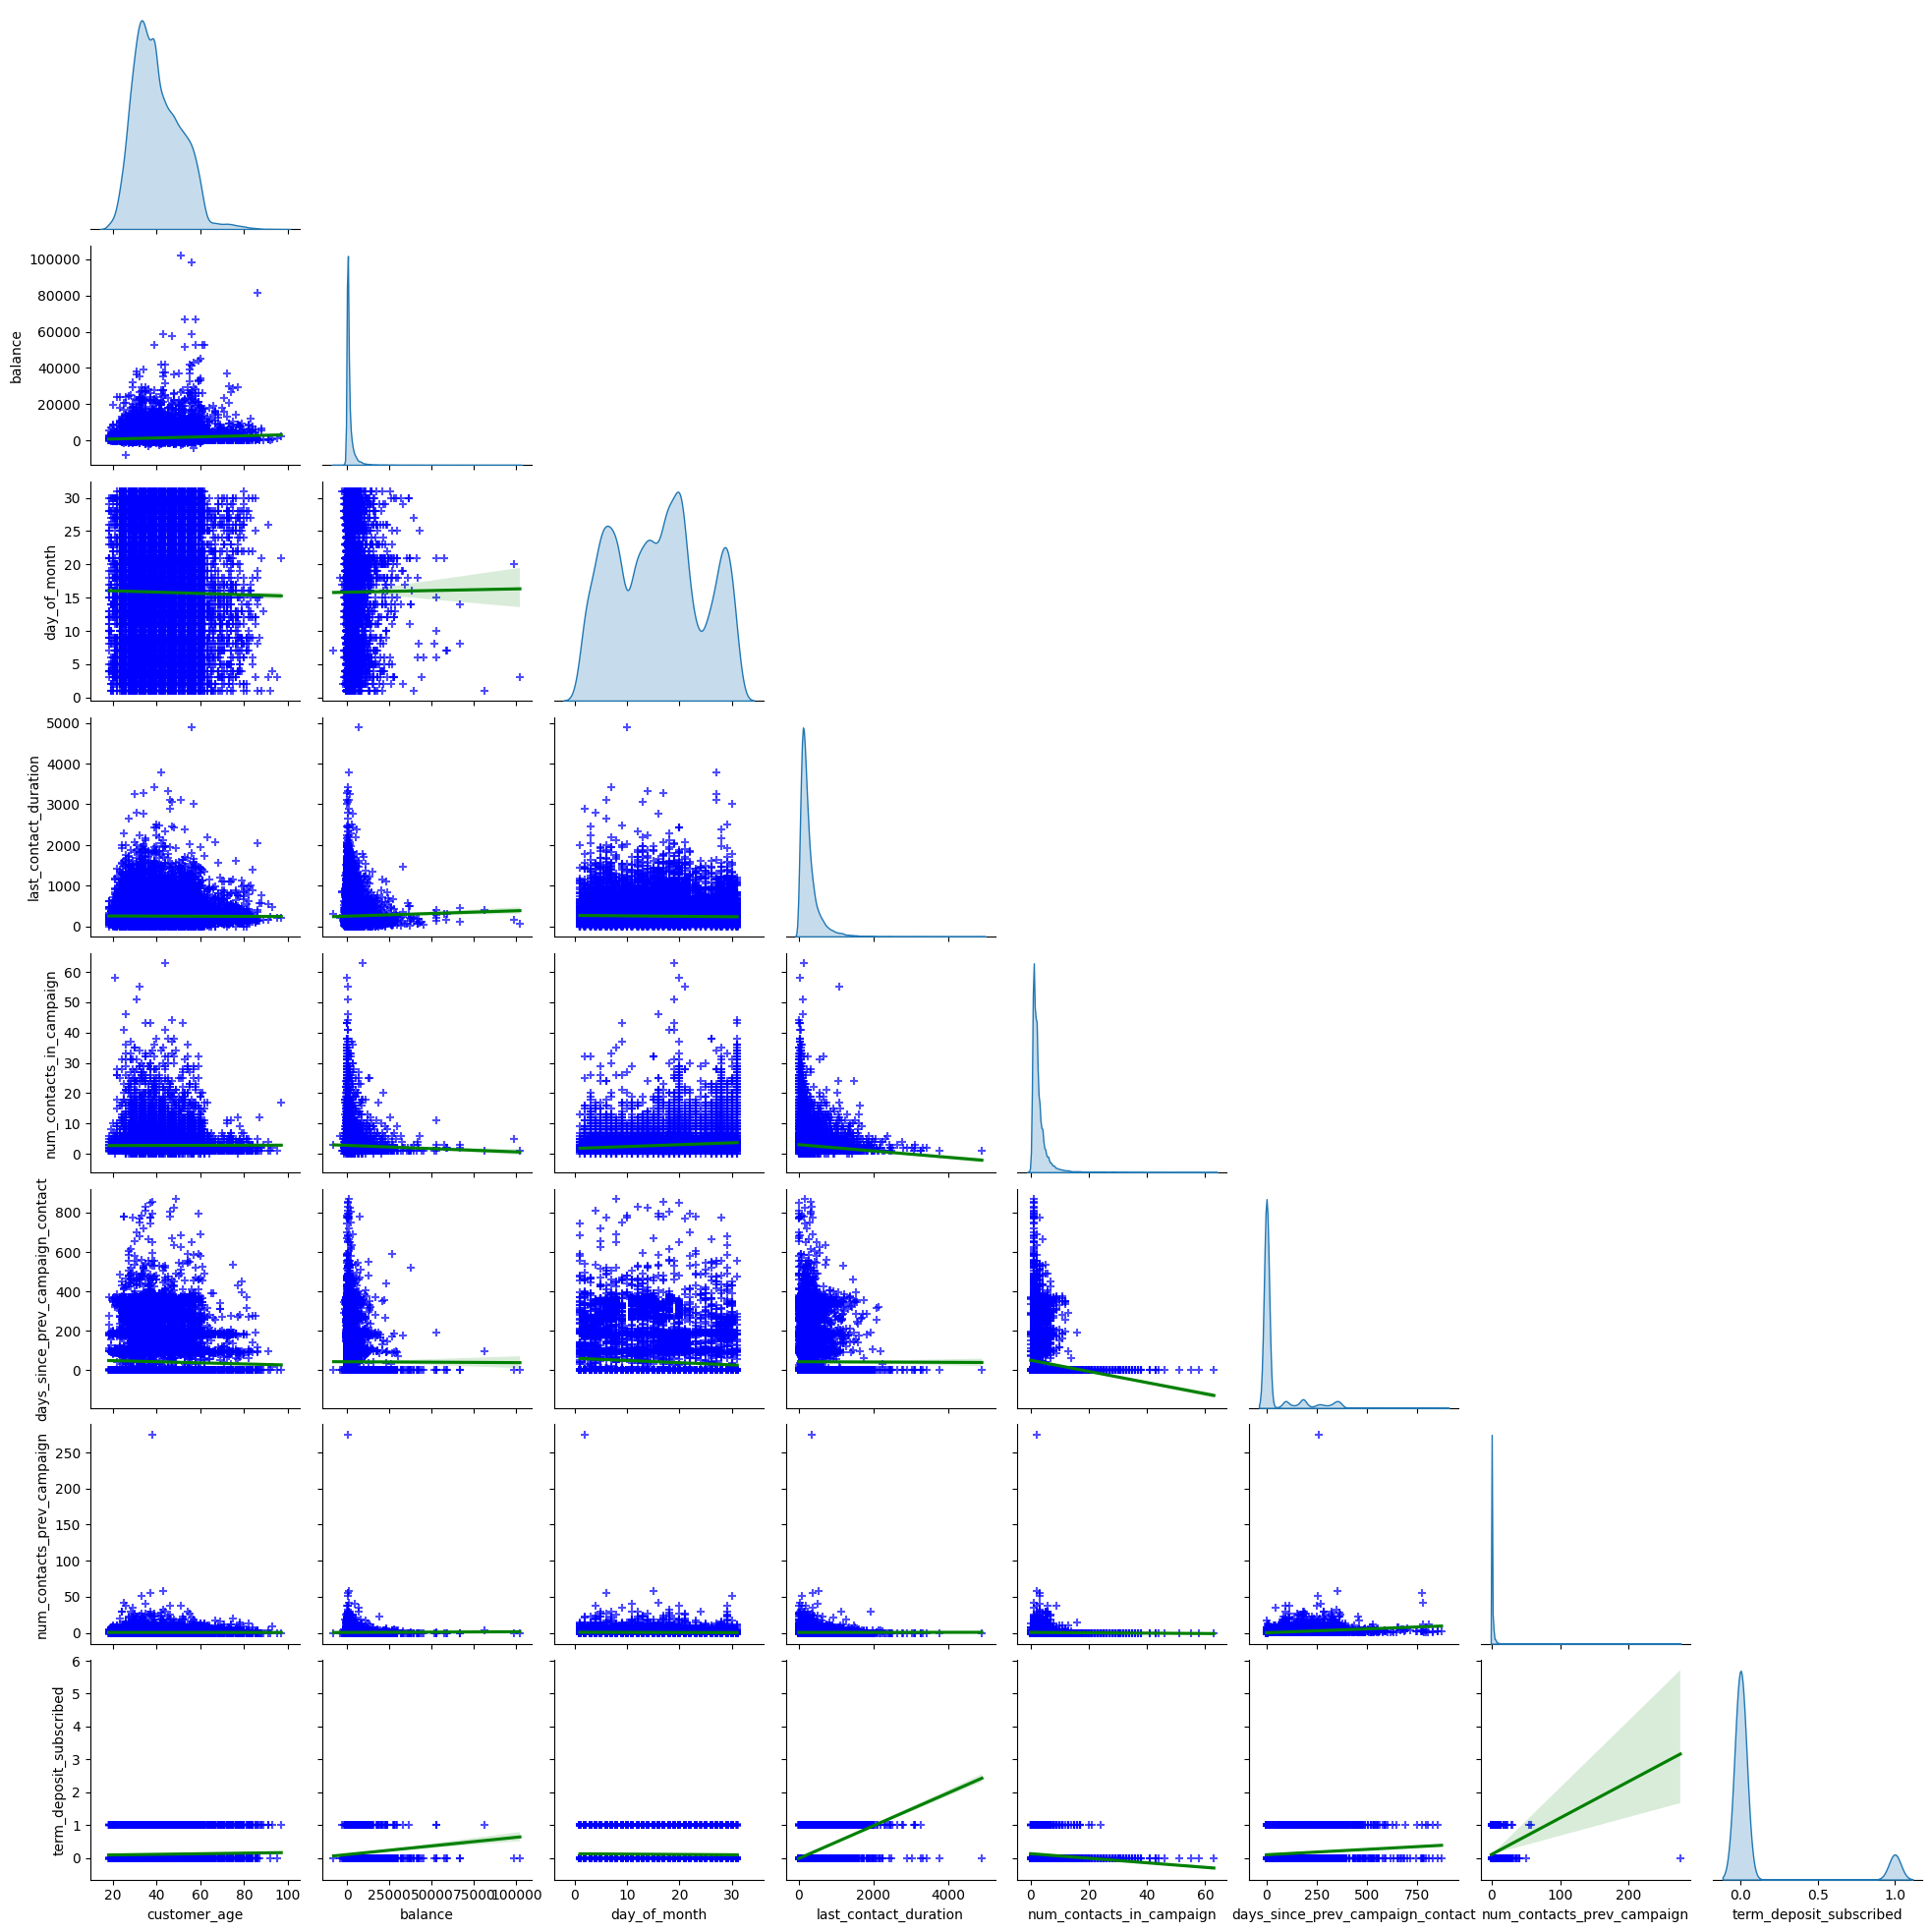

In [363]:
sns.pairplot(df_n,
                 markers="+",
                 diag_kind="kde",
                 kind='reg',
                 plot_kws={'line_kws':{'color':'green'},
                           'scatter_kws': {'alpha': 0.7,
                                           'color': 'blue'}},
                 corner=True);

# **3.Multivariate Analysis**

### **Correlation Anlysis for numeric data**

In [364]:
df_n.select_dtypes(include=[np.number]).corr()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed
customer_age,1.000000,0.101839,-0.012598,-0.006454,0.005754,-0.029682,-0.001395,0.031045
balance,0.101839,1.000000,0.001835,0.015975,-0.020950,-0.001357,0.011554,0.052095
day_of_month,-0.012598,0.001835,1.000000,-0.033719,0.164407,-0.093014,-0.050596,-0.026898
last_contact_duration,-0.006454,0.015975,-0.033719,1.000000,-0.084824,-0.001989,0.004055,0.412853
num_contacts_in_campaign,0.005754,-0.020950,0.164407,-0.084824,1.000000,-0.089481,-0.033187,-0.070614
days_since_prev_campaign_contact,-0.029682,-0.001357,-0.093014,-0.001989,-0.089481,1.000000,0.426584,0.106762
num_contacts_prev_campaign,-0.001395,0.011554,-0.050596,0.004055,-0.033187,0.426584,1.000000,0.089881
term_deposit_subscribed,0.031045,0.052095,-0.026898,0.412853,-0.070614,0.106762,0.089881,1.000000


<Axes: >

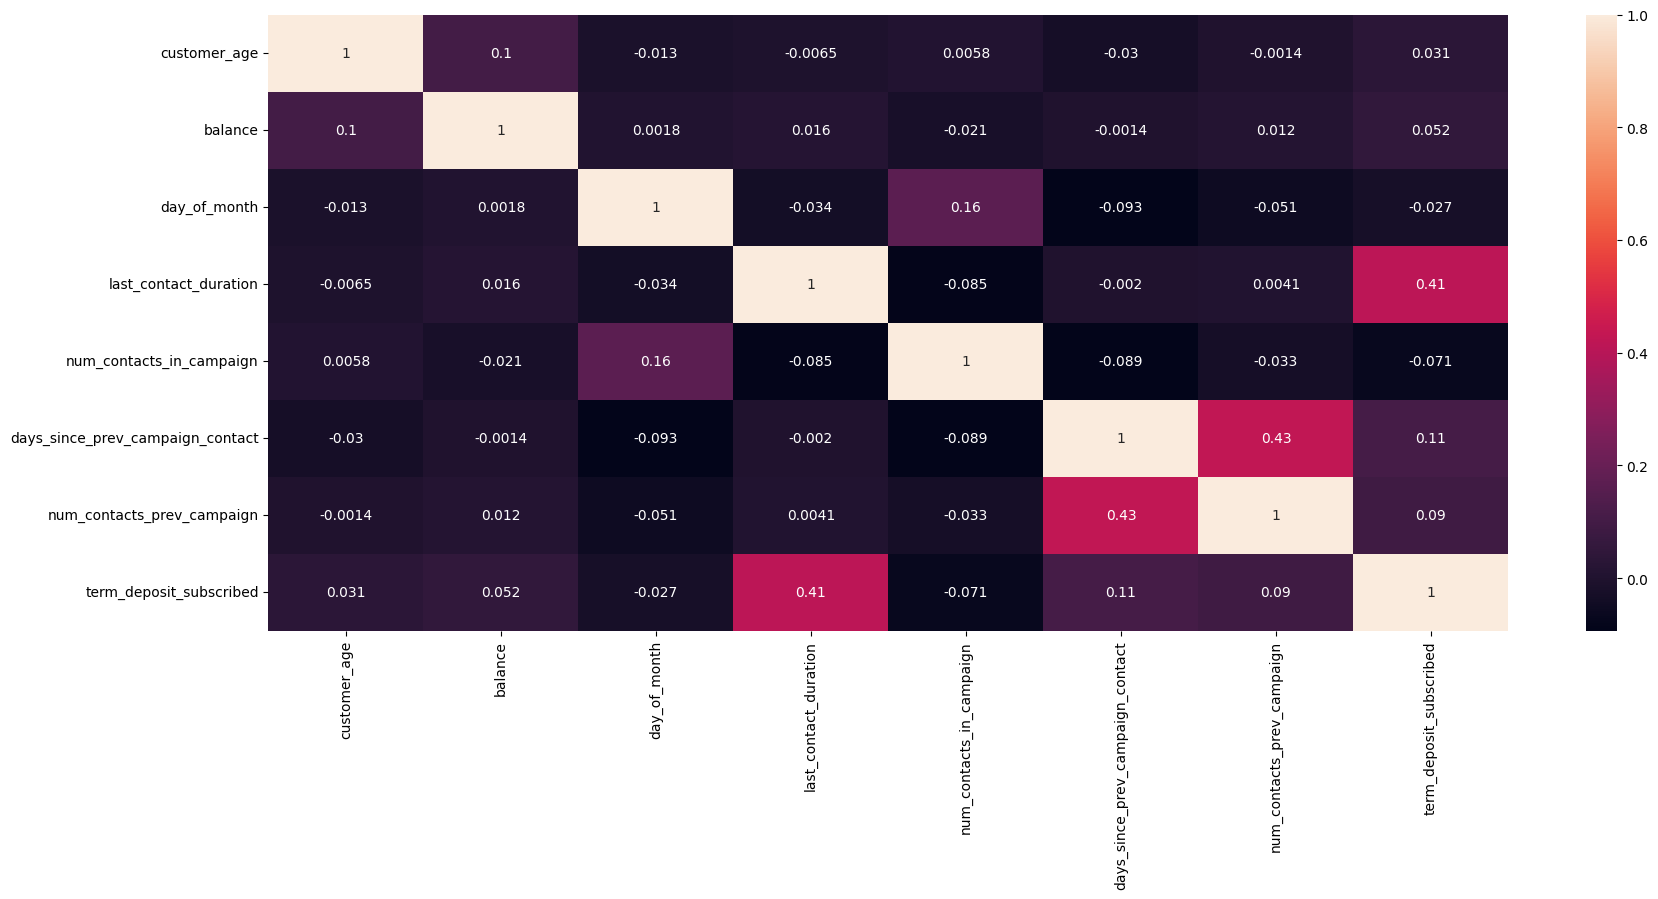

In [365]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(df_n.select_dtypes(include=[np.number]).corr(),annot=True)

Observation from the correlation plot

1. No high correlation can be seen
2. There is slight corelation between last_contact_duration and Term_deposit_subscribed

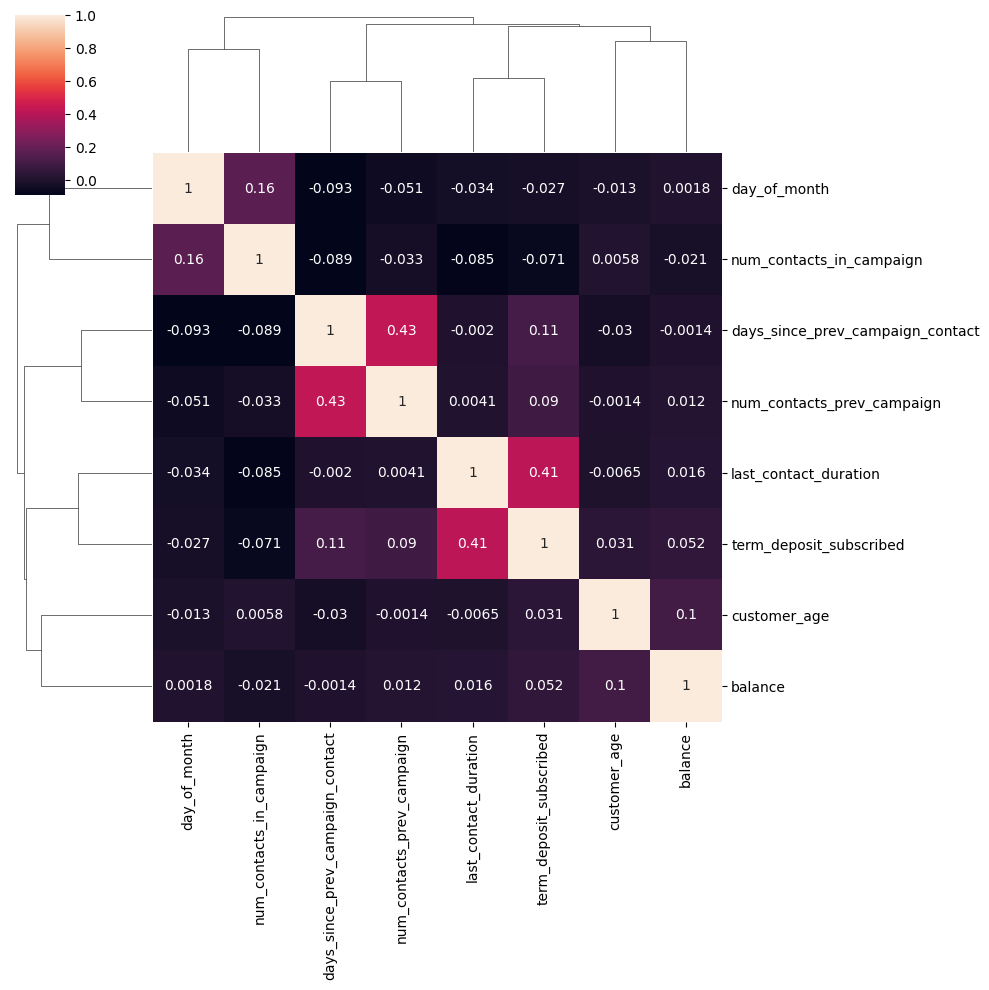

In [366]:
sns.clustermap(df_n.select_dtypes(include=[np.number]).corr(),annot=True)

# **skewness**

Absolute values of skewnwss greater than 0.8 are treated using log transformation.

In [367]:
'''
#plotting the histogram before log transformation
for i in df_n.select_dtypes(include='float').columns:
  print(i)
  print(f"skewnwss for column {i} is {df_n[i].skew()}")
  sns.histplot(df_n[i])
  plt.show()
  if abs(df_n[i].skew())>0.8:
    df_n[i]=np.log1p(df_n[i])
'''

'\n#plotting the histogram before log transformation\nfor i in df_n.select_dtypes(include=\'float\').columns:\n  print(i)\n  print(f"skewnwss for column {i} is {df_n[i].skew()}")\n  sns.histplot(df_n[i])\n  plt.show()\n  if abs(df_n[i].skew())>0.8:\n    df_n[i]=np.log1p(df_n[i])\n'

No skewnwss treatment has been done.

customer_age
skewnwss for column customer_age is 0.6760550814614379


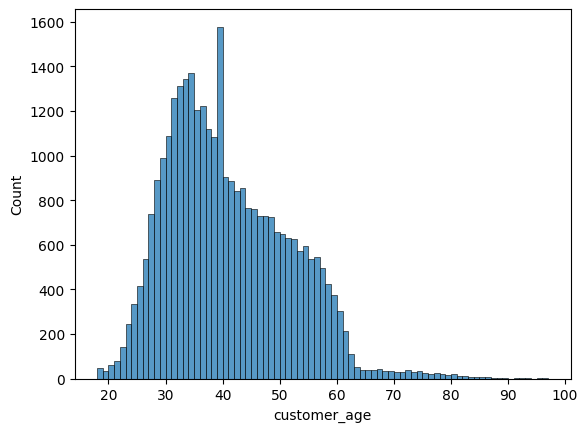

balance
skewnwss for column balance is 8.543262357149327


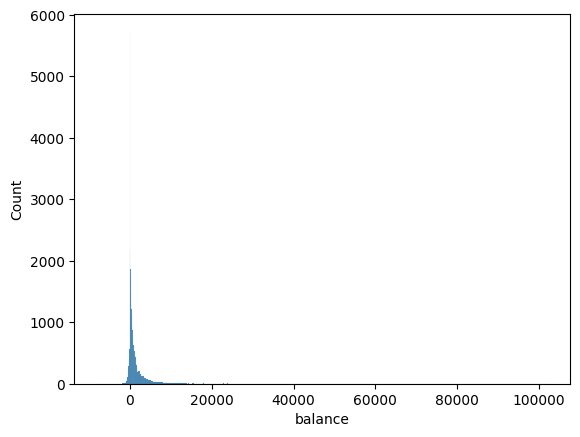

last_contact_duration
skewnwss for column last_contact_duration is 3.1548640227438893


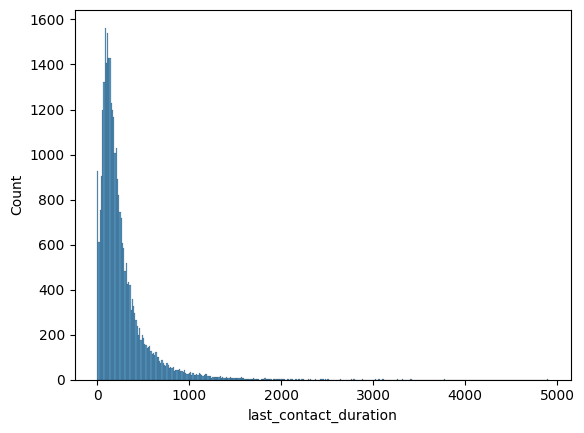

days_since_prev_campaign_contact
skewnwss for column days_since_prev_campaign_contact is 2.5916235844580306


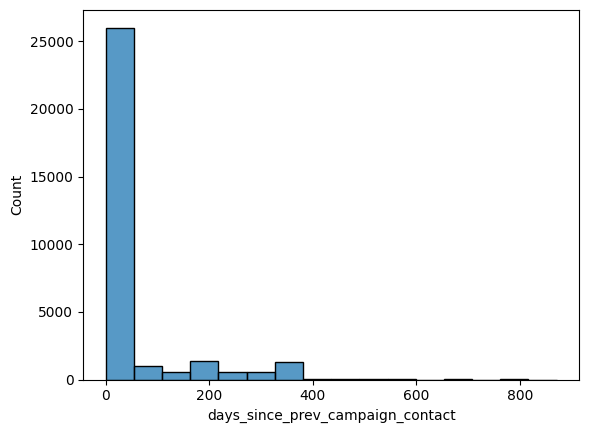

In [222]:
#plotting histograms
pd.set_option('display.max_rows', None)
for i in df_n.select_dtypes(include='float').columns:
  print(i)
  print(f"skewnwss for column {i} is {df_n[i].skew()}")
  sns.histplot(df_n[i])
  plt.show()

# **Label encoding**

In [223]:
#Label encoding categorical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in col_to_le:
  df_n[i]=le.fit_transform(df_n[i])


In [224]:
#Checking data types to see the encoding
df_n.dtypes

customer_age                        float64
job_type                              int64
marital                               int64
education                             int64
default                               int64
balance                             float64
housing_loan                          int64
personal_loan                         int64
communication_type                    int64
day_of_month                          int64
month                                 int64
last_contact_duration               float64
num_contacts_in_campaign              int64
days_since_prev_campaign_contact    float64
num_contacts_prev_campaign            int64
prev_campaign_outcome                 int64
term_deposit_subscribed               int64
dtype: object

In [225]:
df_n.isna().sum()

customer_age                        0
job_type                            0
marital                             0
education                           0
default                             0
balance                             0
housing_loan                        0
personal_loan                       0
communication_type                  0
day_of_month                        0
month                               0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
prev_campaign_outcome               0
term_deposit_subscribed             0
dtype: int64

In [226]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_std = scaler.fit_transform(df_n)


# **Test data**

# **1. Under standing Test data**



### **.Data loading**

In [227]:
#loading train data
df=pd.read_csv("/content/Test.csv")

## **2.Data Exploration**

In [228]:
#Displying Dataframe
df.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,NaN,0,unknown
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,NaN,0,unknown
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,NaN,0,unknown
3,id_174,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,jun,34.0,1.0,NaN,0,unknown
4,id_2115,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0,188.0,1,success


In [229]:
#Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                13564 non-null  object 
 1   customer_age                      13294 non-null  float64
 2   job_type                          13564 non-null  object 
 3   marital                           13483 non-null  object 
 4   education                         13564 non-null  object 
 5   default                           13564 non-null  object 
 6   balance                           13383 non-null  float64
 7   housing_loan                      13564 non-null  object 
 8   personal_loan                     13490 non-null  object 
 9   communication_type                13564 non-null  object 
 10  day_of_month                      13564 non-null  int64  
 11  month                             13564 non-null  object 
 12  last

There are 13564 records of data under 17 columns.There are categorical as well as numerical columns with some missing values.

In [230]:
#The data types value_counts
df.dtypes.value_counts()

object     10
float64     5
int64       2
Name: count, dtype: int64

Same as train data

In [231]:
#Statistical summary of numeric data
df.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign
count,13294.000000,13383.000000,13564.000000,13442.000000,13519.000000,2441.000000,13564.000000
mean,40.450429,1341.405514,15.778089,261.171031,2.730971,223.582958,0.553966
std,10.747881,2839.670990,8.321562,261.195560,2.941338,116.196526,1.762402
min,18.000000,-6849.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,32.000000,70.500000,8.000000,102.000000,1.000000,131.000000,0.000000
50%,39.000000,447.000000,16.000000,182.000000,2.000000,194.000000,0.000000
75%,48.000000,1466.000000,21.000000,325.000000,3.000000,323.000000,0.000000
max,94.000000,71187.000000,31.000000,3863.000000,50.000000,842.000000,38.000000


In [232]:
#summary of the categorical columns
df.describe(include='object')

,id,job_type,marital,education,default,housing_loan,personal_loan,communication_type,month,prev_campaign_outcome
count,13564,13564,13483,13564,13564,13564,13490,13564,13564,13564
unique,13564,12,3,4,2,2,2,3,12,4
top,id_17231,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,1,2916,8123,6955,13302,7430,11314,8805,4081,11126


In [233]:
#Missing values identification
df.isna().sum()

id                                      0
customer_age                          270
job_type                                0
marital                                81
education                               0
default                                 0
balance                               181
housing_loan                            0
personal_loan                          74
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 122
num_contacts_in_campaign               45
days_since_prev_campaign_contact    11123
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
dtype: int64

In [234]:
#Defining empty lists to identify which columns to be handled for missing values and encode
col_to_le=[]
col_to_miss=[]

In [235]:
#Defining a function for the univariate analysis of each column,
#ploting histograms for discrete numerical column, kdeplot for continuous numeric and
#countplot for categorical column , also identifying number of  missing values for each column
def eda(x,df,y):
  if df[x].dtype=='object':
    sns.countplot(df[x])
    plt.show()
    print(f"value_counts of {x}",df[x].value_counts())
  elif df[x].dtype=='int64':
    sns.histplot(df[x])
    plt.show()
    print(f"value_counts of {x}",df[x].value_counts())
  else:
    sns.kdeplot(df[x])
    plt.show()



  print(f"missing values of {x}",df[x].isna().sum())
  if df[x].isna().sum()>0:
    y.append(x)


In [236]:
#Column names list
df.columns

Index(['id', 'customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'prev_campaign_outcome'],
      dtype='object')

In [237]:
#To check for duplicated records of data
df[df.duplicated(keep='first')]

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome


# **Under standing data**





## **customer_age**

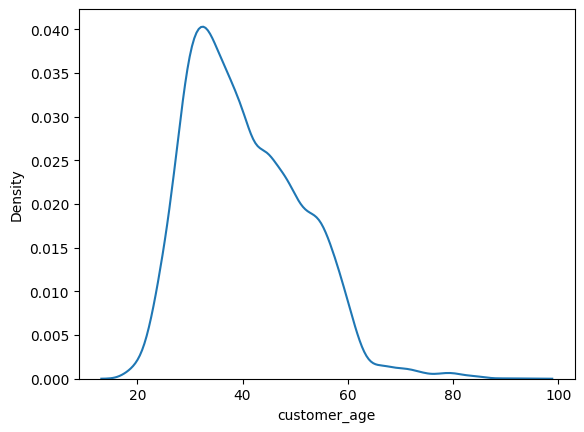

missing values of customer_age 270


In [238]:
eda('customer_age',df,col_to_miss)

1.Continous numeric data

2.Missing values to be handled, can be filled with mean

## **job_type**

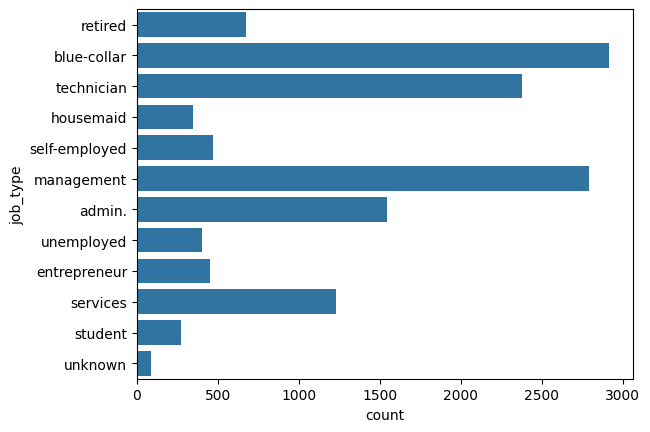

value_counts of job_type job_type
blue-collar      2916
management       2792
technician       2377
admin.           1544
services         1231
retired           673
self-employed     468
entrepreneur      450
unemployed        402
housemaid         347
student           275
unknown            89
Name: count, dtype: int64
missing values of job_type 0


In [239]:
eda('job_type',df,col_to_miss)

In [240]:
col_to_le.append('job_type')

1.Categorical data to be encoded

2.No missing values


## **marital**

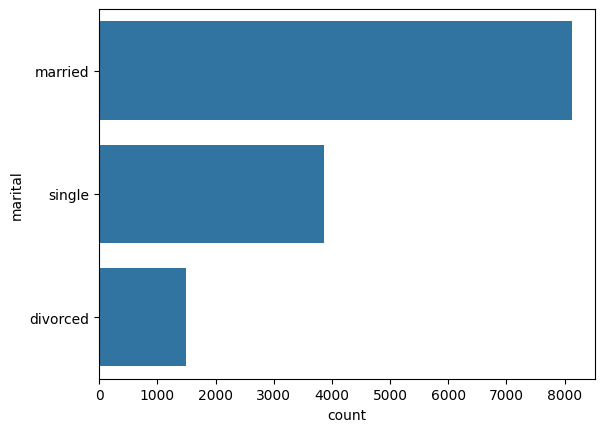

value_counts of marital marital
married     8123
single      3869
divorced    1491
Name: count, dtype: int64
missing values of marital 81


In [241]:
eda('marital',df,col_to_miss)

In [242]:
col_to_le.append('marital')

1.Categorical data to be encoded

2.Missing values to be handled

3.Majority is married

## **education  **

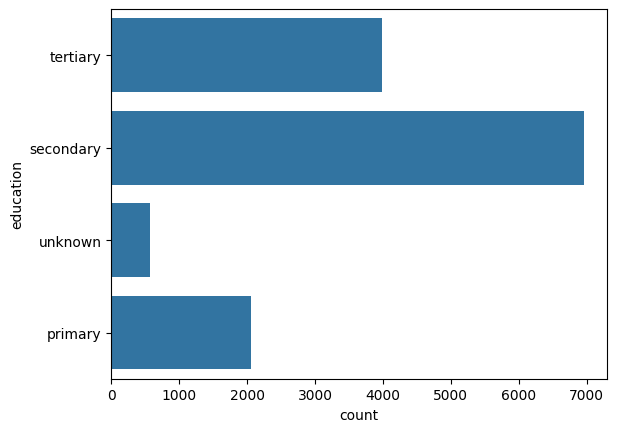

value_counts of education education
secondary    6955
tertiary     3980
primary      2064
unknown       565
Name: count, dtype: int64
missing values of education 0


In [243]:
eda('education',df,col_to_miss)

In [244]:
col_to_le.append('education')

1.Categorical data to be encoded

2.No missing values

3.Secondary education is polling the most

## **'default'**

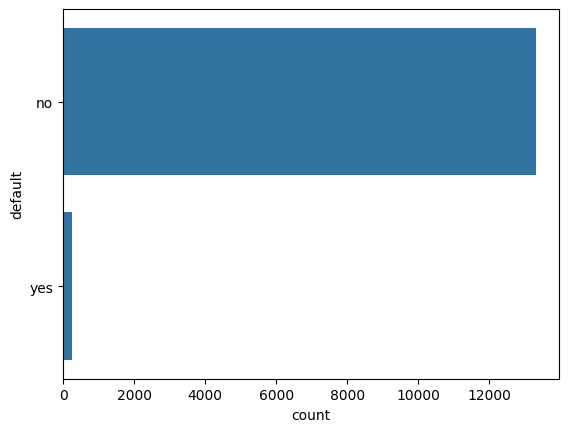

value_counts of default default
no     13302
yes      262
Name: count, dtype: int64
missing values of default 0


In [245]:
eda('default',df,col_to_miss)

In [246]:
col_to_le.append('default')

1.Categorical data to be encoded

2.No missing values

3.Majority is non defaulters

## **'balance'**

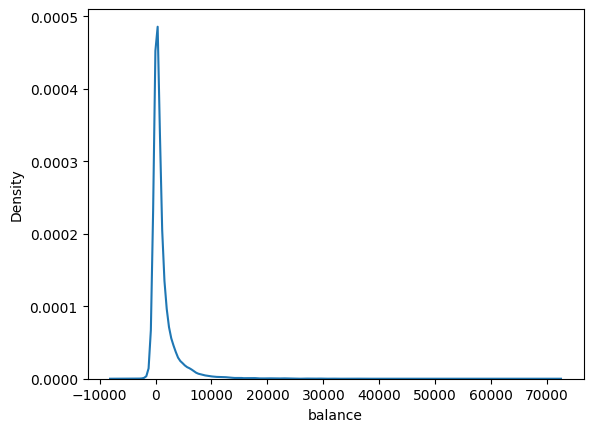

missing values of balance 181


In [247]:
eda('balance',df,col_to_miss)

1.Continous numeric data

2.Missing values to be treated

3.Left skewed



## **'housing_loan'**

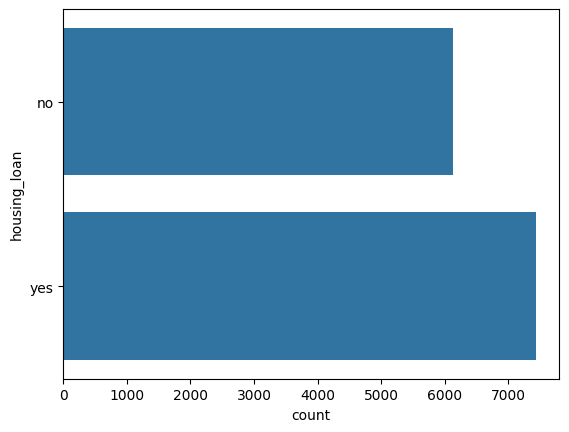

value_counts of housing_loan housing_loan
yes    7430
no     6134
Name: count, dtype: int64
missing values of housing_loan 0


In [248]:
eda('housing_loan',df,col_to_miss)

In [249]:
col_to_le.append('housing_loan')

1.Categorical data to be encoded


## **personal_loan**

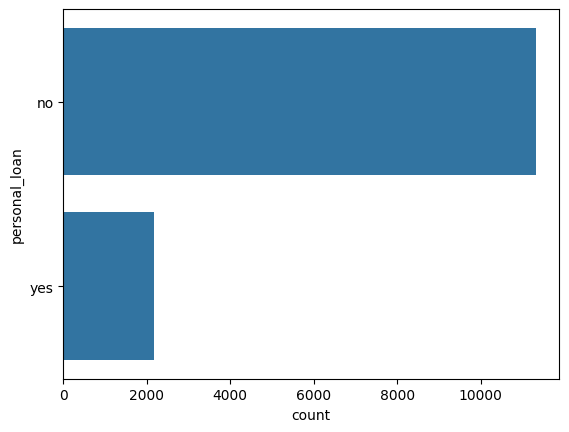

value_counts of personal_loan personal_loan
no     11314
yes     2176
Name: count, dtype: int64
missing values of personal_loan 74


In [250]:
eda('personal_loan',df,col_to_miss)

In [251]:
col_to_le.append('personal_loan')

1.Categorical data to be encoded

2.Missing values to be treated

3.Majority have personal loan

## **'communication_type'**

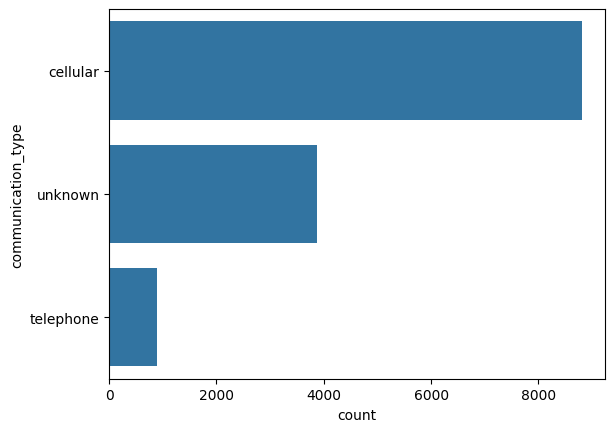

value_counts of communication_type communication_type
cellular     8805
unknown      3869
telephone     890
Name: count, dtype: int64
missing values of communication_type 0


In [252]:
eda('communication_type',df,col_to_miss)

In [253]:
col_to_le.append('communication_type')

1.Categorical data to be encoded

2.Majority have been contacted by cellular

## **'day_of_month'**

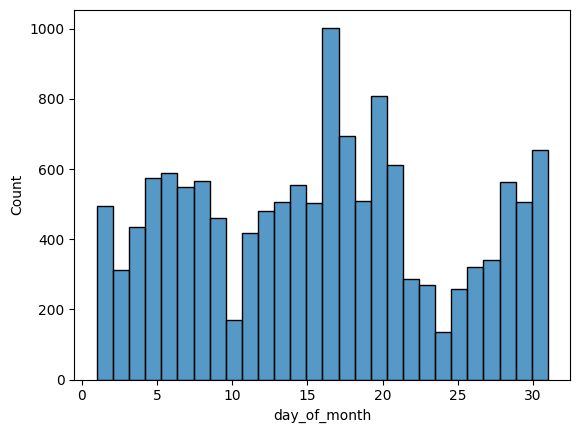

value_counts of day_of_month day_of_month
20    808
18    693
21    612
6     590
5     574
17    573
8     566
28    562
14    554
7     548
19    508
13    505
29    505
15    502
12    481
30    479
9     460
4     436
16    430
11    417
2     408
27    341
26    320
3     312
22    287
23    269
25    257
31    174
10    171
24    135
1      87
Name: count, dtype: int64
missing values of day_of_month 0


In [254]:
eda('day_of_month',df,col_to_miss)

1.Discrete Numeric data


## **'month'**

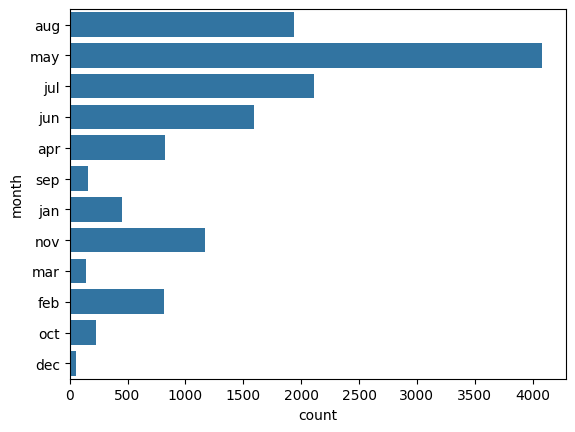

value_counts of month month
may    4081
jul    2109
aug    1939
jun    1595
nov    1169
apr     821
feb     813
jan     450
oct     228
sep     162
mar     139
dec      58
Name: count, dtype: int64
missing values of month 0


In [255]:
eda('month',df,col_to_miss)

In [256]:
col_to_le.append('month')

1.Categorical data to be encoded

## **'last_contact_duration'**

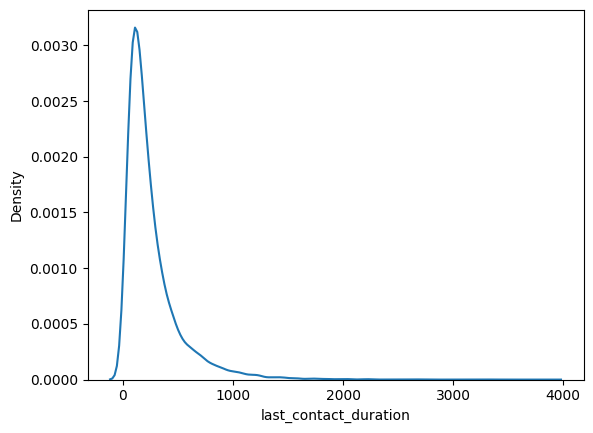

missing values of last_contact_duration 122


In [257]:
eda('last_contact_duration',df,col_to_miss)

1.Continuous numeric data

2.Missing values can be filled by zero

## **'num_contacts_in_campaign'**

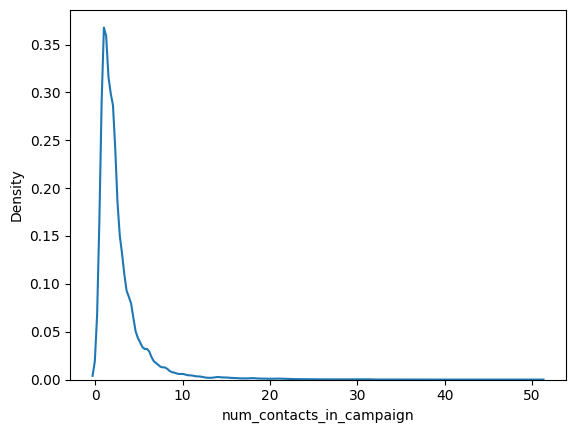

missing values of num_contacts_in_campaign 45


In [258]:
eda('num_contacts_in_campaign',df,col_to_miss)

1.Continuous numeric data but it can be converted to discrete numeric after treating missing values.

## **'days_since_prev_campaign_contact'**

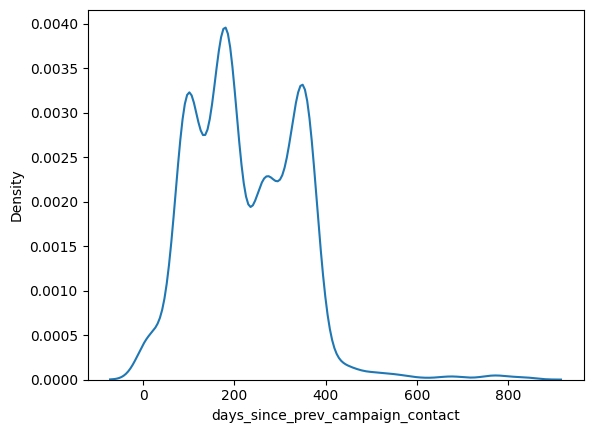

missing values of days_since_prev_campaign_contact 11123


In [259]:
eda('days_since_prev_campaign_contact',df,col_to_miss)

1.Continuous numeric data

2.Missing values to be treated


## **'num_contacts_prev_campaign'**

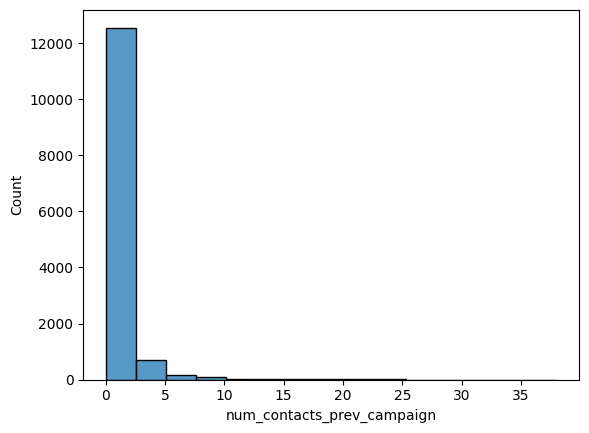

value_counts of num_contacts_prev_campaign num_contacts_prev_campaign
0     11123
1       834
2       599
3       336
4       214
5       148
6        89
7        57
8        38
9        30
11       19
10       19
12       10
13       10
16        7
15        6
19        4
14        4
17        4
23        2
21        2
22        1
26        1
29        1
20        1
28        1
24        1
27        1
18        1
38        1
Name: count, dtype: int64
missing values of num_contacts_prev_campaign 0


In [260]:
eda('num_contacts_prev_campaign',df,col_to_miss)

1.Discrte numeric column

## **'prev_campaign_outcome'**

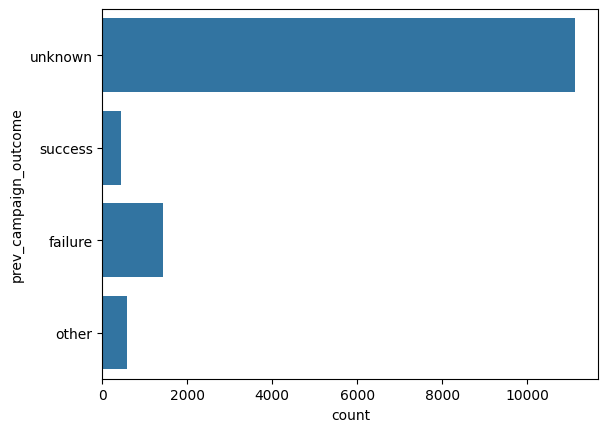

value_counts of prev_campaign_outcome prev_campaign_outcome
unknown    11126
failure     1429
other        568
success      441
Name: count, dtype: int64
missing values of prev_campaign_outcome 0


In [261]:
eda('prev_campaign_outcome',df,col_to_miss)

In [262]:
col_to_le.append('prev_campaign_outcome')

1.Categorical data to be  label encoded
2.Majority has unknown outcome

# **4.Data Cleaning**

### **Handling missing Values**

In [263]:
#Columns t handle missing values
col_to_miss

['customer_age',
 'marital',
 'balance',
 'personal_loan',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'days_since_prev_campaign_contact']

In [264]:
#Customer age
#filtered=df[df['customer_age'].isna()]
#filtered

In [265]:
#pd.set_option('display.max_rows', None)
#pd.crosstab(df['customer_age'],df['marital'])

In [266]:
#Filling na value with median of the columns
df['customer_age'].fillna(df['customer_age'].median(),inplace=True)

In [267]:
#filtered=df[df['marital'].isna()]
#filtered

In [268]:
#Marital na values are filled by constant = missing
df['marital'].fillna('missing',inplace=True)

In [269]:
#Balance
#filtered=df[df['balance'].isna()]
#filtered

In [270]:
#Filling na values with zero
df['balance']=df['balance'].fillna(0)

In [271]:
#Personal loan
#pd.crosstab(df['personal_loan'],df['job_type'])

In [272]:
#filtered=df[df['personal_loan'].isna()]
#filtered

In [273]:
#Filling na values with constant=no
df['personal_loan'].fillna('no',inplace=True)

In [274]:
#last_contact_duration
df['last_contact_duration'].fillna(0,inplace=True)

In [275]:
# filtered=df[df['last_contact_duration'].isna()]
 #filtered

In [276]:
#num_contacts_in_campaign
#filtered=df[df['num_contacts_in_campaign'].isna()]
#filtered

In [277]:
#filling na values with  0
df['num_contacts_in_campaign'].fillna(0,inplace=True)

In [278]:
#num_contacts_in_campaign -data type changed to int
df['num_contacts_in_campaign'] = df['num_contacts_in_campaign'].round().astype(int)


In [279]:
#eda('num_contacts_in_campaign',df,col_to_miss)

In [280]:
#days_since_prev_campaign_contact na values filled by zero
df['days_since_prev_campaign_contact'].fillna(0,inplace=True)

In [281]:
#pd.crosstab(df['num_contacts_in_campaign'],df['job_type'])

In [282]:
df.isna().sum()

id                                  0
customer_age                        0
job_type                            0
marital                             0
education                           0
default                             0
balance                             0
housing_loan                        0
personal_loan                       0
communication_type                  0
day_of_month                        0
month                               0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
prev_campaign_outcome               0
dtype: int64

Missing values are treated.

### **Outliers-Handling**

<Axes: >

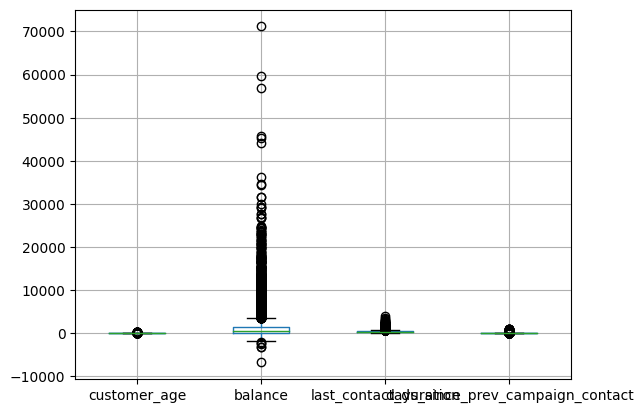

In [283]:
#Plotting boxplots to identify the outliers
df.select_dtypes(include='float').boxplot()

In [284]:
#Identifying ouliers in each column of continuous numeric data
for i in df.select_dtypes(include='float').columns:
  outlier=[]
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1

  for j in df[i]:
    if(j< Q1-1.5* IQR) | (j> Q3+1.5* IQR):
      outlier.append(j)
  print(f"outlier for column {i}are ",outlier)
  #Outlier is not handled as it will remove the column 'num_contacts_prev_campaign'
  '''
  #Handling outliers
  df[i] = np.clip(df[i], Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)
  outlier_n=[]
  for j in df[i]:
    if(j< Q1-1.5* IQR) | (j> Q3+1.5* IQR):
      outlier_n.append(j)
  print(f"outlier for column {i}are ",outlier_n)
'''

outlier for column customer_ageare  [79.0, 73.0, 74.0, 73.0, 78.0, 81.0, 80.0, 80.0, 73.0, 81.0, 81.0, 79.0, 73.0, 79.0, 80.0, 75.0, 73.0, 79.0, 85.0, 74.0, 73.0, 77.0, 74.0, 75.0, 85.0, 75.0, 85.0, 78.0, 73.0, 82.0, 76.0, 81.0, 84.0, 75.0, 83.0, 76.0, 80.0, 81.0, 76.0, 75.0, 74.0, 83.0, 80.0, 79.0, 84.0, 82.0, 94.0, 80.0, 81.0, 76.0, 73.0, 79.0, 82.0, 79.0, 84.0, 78.0, 80.0, 78.0, 74.0, 78.0, 73.0, 73.0, 82.0, 79.0, 75.0, 87.0, 78.0, 73.0, 79.0, 81.0, 81.0, 81.0, 77.0, 91.0, 80.0, 77.0, 78.0, 74.0, 84.0, 84.0, 79.0, 74.0, 83.0, 77.0, 74.0, 79.0, 78.0, 77.0, 74.0, 77.0, 77.0, 74.0, 74.0, 84.0, 80.0, 85.0, 90.0, 86.0, 78.0, 75.0]
outlier for column balanceare  [7136.0, 6023.0, 3815.0, 5240.0, 10758.0, 6731.0, 4408.0, 19099.0, 5769.0, 6824.0, 3930.0, 5087.0, 5540.0, 6133.0, 16398.0, 5005.0, 7388.0, 6487.0, 5132.0, 4394.0, 4595.0, 8898.0, 3706.0, 4054.0, 5339.0, 4146.0, 3514.0, 5612.0, 7387.0, 3972.0, 6991.0, 6202.0, 7036.0, 9727.0, 4081.0, 15299.0, 4908.0, 3730.0, 8143.0, 26834.0, 3574.0

In [285]:
#Creating a copy of data frame and further analysis is done on df_n
df_n=df.copy()

In [286]:
#Dropping the id
df_n.drop(['id'],axis=1,inplace=True)

# **skewness**

Absolute values of skewnwss greater than 0.8 are treated using log transformation.

In [287]:
'''
#plotting the histogram before log transformation
for i in df_n.select_dtypes(include='float').columns:
  print(i)
  print(f"skewnwss for column {i} is {df_n[i].skew()}")
  sns.histplot(df_n[i])
  plt.show()
  if abs(df_n[i].skew())>0.8:
    df_n[i]=np.log1p(df_n[i])
'''

'\n#plotting the histogram before log transformation\nfor i in df_n.select_dtypes(include=\'float\').columns:\n  print(i)\n  print(f"skewnwss for column {i} is {df_n[i].skew()}")\n  sns.histplot(df_n[i])\n  plt.show()\n  if abs(df_n[i].skew())>0.8:\n    df_n[i]=np.log1p(df_n[i])\n'

customer_age
skewnwss for column customer_age is 0.6811675490030977


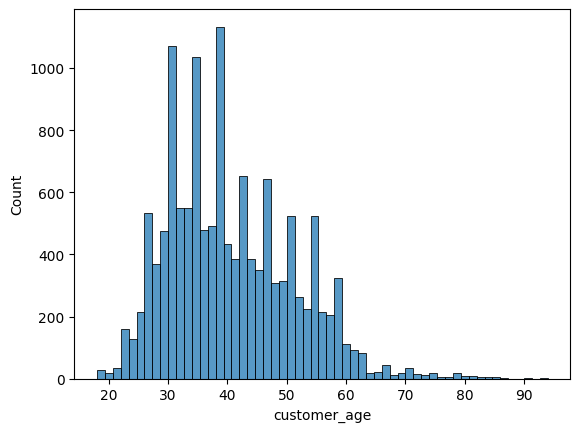

balance
skewnwss for column balance is 6.8010288771436676


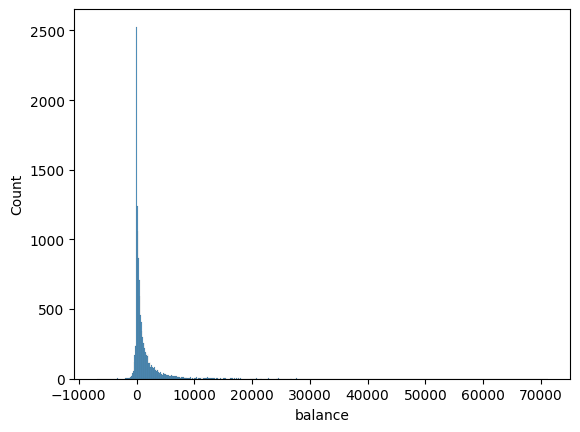

last_contact_duration
skewnwss for column last_contact_duration is 3.052484659142886


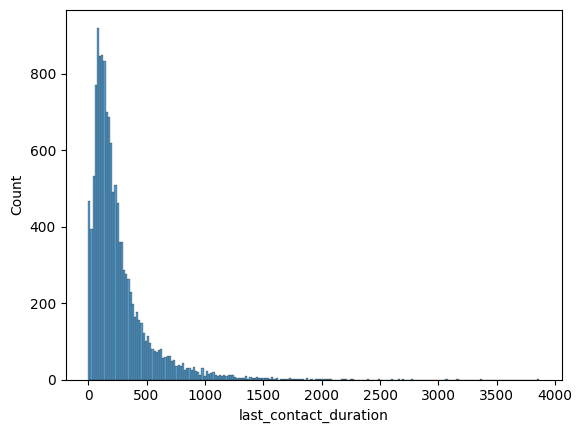

days_since_prev_campaign_contact
skewnwss for column days_since_prev_campaign_contact is 2.6941776599967566


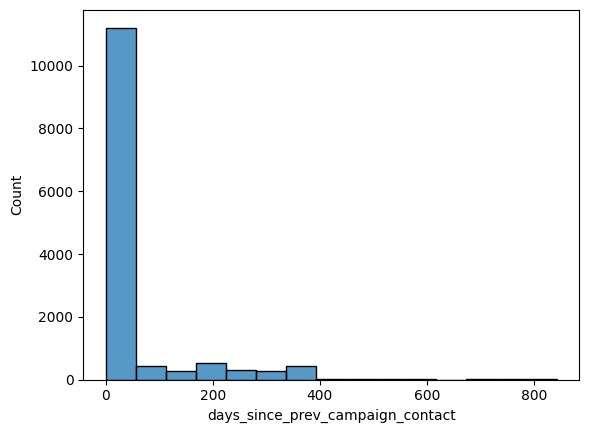

In [288]:
#plotting histograms
pd.set_option('display.max_rows', None)
for i in df_n.select_dtypes(include='float').columns:
  print(i)
  print(f"skewnwss for column {i} is {df_n[i].skew()}")
  sns.histplot(df_n[i])
  plt.show()

# **Label encoding**

In [289]:
#Label encoding categorical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in col_to_le:
  df_n[i]=le.fit_transform(df_n[i])


In [290]:
#Checking data types to see the encoding
df_n.dtypes

customer_age                        float64
job_type                              int64
marital                               int64
education                             int64
default                               int64
balance                             float64
housing_loan                          int64
personal_loan                         int64
communication_type                    int64
day_of_month                          int64
month                                 int64
last_contact_duration               float64
num_contacts_in_campaign              int64
days_since_prev_campaign_contact    float64
num_contacts_prev_campaign            int64
prev_campaign_outcome                 int64
dtype: object

In [291]:
df_n.isna().sum()

customer_age                        0
job_type                            0
marital                             0
education                           0
default                             0
balance                             0
housing_loan                        0
personal_loan                       0
communication_type                  0
day_of_month                        0
month                               0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
prev_campaign_outcome               0
dtype: int64

# **Scaling**

In [292]:
#Scaled data is stored in df_std
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_std = scaler.fit_transform(df_n)


# **Conclusion**
1.Both train and test data is anlysed by various plots

2.Univariate,Bivariate,Multivariate analysis has been done od the train data set.

2.Data cleaning is performed on both

3.Missing values has been treated in both

4.Outliers are identified but not handles as it affects the data differently.

5.Skewnwss of different continuous numeric columns has been identified.But no measures are taken as while appliying log transformation it gives NAN values in one column. Plans to apply sqrt or box cox transformation.

6.Scaling has been done on the data.
